#short summary for the nootbook:
##Note: Please see all the codes and the results first before running any code and there is comments that explains the codes simply
###1.importing needed libraries
###2.cleaning the dataset from nulls
###3.determining the outliers
###4.physiological and mathematical feature extraction
###5.visaulisation on the data
###6.splitting the data into train and test data and scaling
###7.training sevral models and evaluting and choosing the suitable one and some visaulastion graphs for the choosen one

##1.importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
import lightgbm as lgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, roc_curve

##2.cleaning the dataset from nulls

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.isna().sum() # we can see that the data is cleaned from nulls

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# this shows that there is zero values in the columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
# but since it is not normal that living indvisauls can get 0 in this categories we will consider th cells that has 0 in these columns is nulls

Count of zero values in each target column:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


/tmp/ipython-input-1097525968.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zero_counts.index, y=zero_counts.values, palette='viridis')


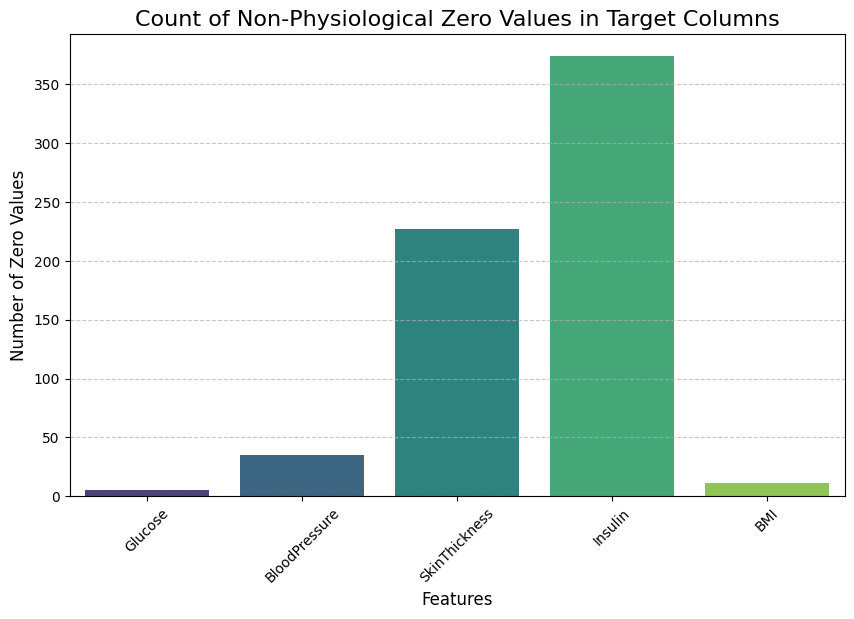

In [8]:
# Define the target columns with non-physiological zero values
target_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count the number of zero values in each target column
zero_counts = (data[target_columns] == 0).sum()

# Print the counts for clarity
print("Count of zero values in each target column:")
print(zero_counts)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_counts.index, y=zero_counts.values, palette='viridis')

# Add titles and labels for clarity
plt.title('Count of Non-Physiological Zero Values in Target Columns', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Zero Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [73]:
# Target columns for imputation
target_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Step 1: Feature Flagging (Creating Imputation Features) ---

print("Creating Binary Flag Features for Imputation...")
for col in target_columns:
    # Create a new binary column 'Is_[ColumnName]_Missing'
    # Value is 1 if original value was 0, 0 otherwise.
    data[f'Is_{col}_Missing'] = (data[col] == 0).astype(int)

# Create a copy of the data to perform imputation without modifying the original
data_imputed = data.copy()

# Step 2: MICE Imputation (IterativeImputer) ---

print("\nStarting MICE Imputation...")

# Replace non-physiological zeros with np.nan so the imputer can recognize them as missing.
for col in target_columns:
    data_imputed[col] = data_imputed[col].replace(0, np.nan)

# Initialize MICE (IterativeImputer)
# We use the default estimator (BayesianRidge) for robust multivariate imputation.
imputer = IterativeImputer(
    max_iter=10,
    random_state=42
)

# Identify numerical columns for imputation, EXCLUDING the 'Outcome' column.
# This is crucial for consistency with prediction data.
cols_to_impute_together = data_imputed.select_dtypes(include=np.number).columns.tolist()
if 'Outcome' in cols_to_impute_together:
    cols_to_impute_together.remove('Outcome')


# Fit and transform the data
# We fit the imputer on the numerical columns *excluding* Outcome.
# We will transform the entire numerical subset that needs imputation,
# but the imputer itself is fitted on the feature space without the target.
# Note: For a proper workflow, you should fit the imputer on X_train only,
# and then transform X_train and X_test (and new data).
# Given the current notebook structure, we will re-fit on the full data excluding Outcome
# for demonstration, but in production, fit on X_train without Outcome.
imputed_data_array = imputer.fit_transform(data_imputed[cols_to_impute_together])

# Update the DataFrame with the imputed values for the imputed columns
data_imputed[cols_to_impute_together] = imputed_data_array

print("MICE Imputation Complete.")

# Verification: Check zero counts again (should be 0 for previously targeted columns)
print("\nNew Zero Counts (should be 0 for previously targeted columns):")
print((data_imputed[target_columns] == 0).sum())

# Now 'data_imputed' is the clean DataFrame, ready for Feature Engineering.

Creating Binary Flag Features for Imputation...

Starting MICE Imputation...
MICE Imputation Complete.

New Zero Counts (should be 0 for previously targeted columns):
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [10]:
# The minimum physiological insulin value is 1.0 (or ~5 uIU/ml based on sources)
# We use 1.0 as a safe minimum to ensure no zero or negative values remain

MIN_PHYSIOLOGICAL_INSULIN = 1.0

# Apply Clamping: If the value is less than 1.0, set it to 1.0
data_imputed['Insulin'] = data_imputed['Insulin'].apply(
    lambda x: max(x, MIN_PHYSIOLOGICAL_INSULIN)
)

# we made this step to set the negative values (lees then 1) to exactly 1
# because physiologicaly there can't be insulin value negative or less then 1

In [11]:
# In this code we replaced the 0 values with numercal data depending on the MICE method in the target columns
# Mice method (Multivariate Imputation by Chained Equations) determine the new values by making prediction depending on the other columns
# And we added more five columns that tells if each value in each target column is predicted(1) or not predicted(0)

In [12]:
data = data_imputed # puting the data imputed in the main data varaible

In [74]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Is_Glucose_Missing,Is_BloodPressure_Missing,...,Is_Insulin_Missing,Is_BMI_Missing,Log_DPF,Glucose_to_Insulin_Ratio,Age_BMI_Interaction,Sqrt_Insulin,Sqrt_Pregnancies,BP_Age_Index,Skin_BMI_Ratio,Is_Glucose_Critical
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0,768.0,...,768.0,768.0,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.641747,72.361292,28.926373,152.667187,32.436839,33.240885,0.348958,0.0,0.0,...,0.0,0.0,-0.959940,1.098831,1080.551120,11.824293,1.695477,2.371777,0.886459,0.389323
std,3.369578,30.466564,12.147518,9.521595,97.303228,6.879242,11.760232,0.476951,0.0,0.0,...,0.0,0.0,0.644322,1.716386,438.335466,3.587485,0.985735,0.694853,0.211417,0.487914
min,0.000000,44.000000,24.000000,7.000000,1.000000,18.200000,21.000000,0.000000,0.0,0.0,...,0.0,0.0,-2.551046,0.206667,382.200000,1.000000,0.000000,0.769231,0.253623,0.000000
25%,1.000000,99.000000,64.000000,22.217409,89.986466,27.500000,24.000000,0.000000,0.0,0.0,...,0.0,0.0,-1.411614,0.705957,744.800000,9.486120,1.000000,1.845400,0.784018,0.000000
50%,3.000000,117.000000,72.000000,28.442091,130.196342,32.000000,29.000000,0.000000,0.0,0.0,...,0.0,0.0,-0.987526,0.881811,987.250000,11.410361,1.732051,2.363636,0.888288,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.000000,36.600000,41.000000,1.000000,0.0,0.0,...,0.0,0.0,-0.468006,1.152846,1357.200000,13.784049,2.449490,2.857143,0.984766,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000,0.0,0.0,...,0.0,0.0,0.883768,43.999956,2697.000000,29.086079,4.123106,4.571428,2.853026,1.000000


In [14]:
# Now the data is cleaned from nulls

##3.determining the outliers

<Axes: >

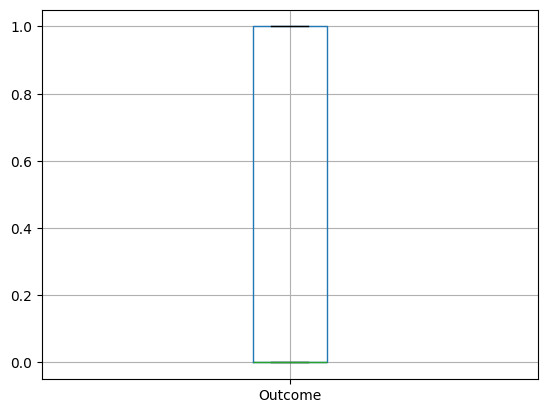

In [15]:
data.boxplot('Outcome')

In [16]:
# the graph shows that the data depending on the outcome column the plot shows there is no outliers

In [17]:
from scipy.stats import zscore

# Calculate the z-scores for the 'Outcome' column
data['Outcome_zscore'] = zscore(data['Outcome'])

# Define a z-score threshold (a common threshold is 3)
zscore_threshold = 1.5
# Identify the outliers
Z_scoreoutliers = data[abs(data['Outcome_zscore']) > zscore_threshold]

# Display the outliers
print(f"Outliers in 'Outcome' based on a z-score threshold of {zscore_threshold}:")
print("Number of outliers using Z-score method:", Z_scoreoutliers.shape[0])
display(Z_scoreoutliers)

Outliers in 'Outcome' based on a z-score threshold of 1.5:
Number of outliers using Z-score method: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Is_Glucose_Missing,Is_BloodPressure_Missing,Is_SkinThickness_Missing,Is_Insulin_Missing,Is_BMI_Missing,Outcome_zscore


In [18]:
#As we see there is no outliers by using z-score method and the outliers begins to appear with 1.3 but
#but 1.5 is most suitable so we can say there is no outliers with this this method

In [19]:
# Calculate Q1 and Q3 for the 'outcome' column
Q1 = data['Outcome'].quantile(0.25)
Q3 = data['Outcome'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

# Identify the outliers using the IQR method
outliers_iqr = data[(data['Outcome'] < lower_bound) | (data['Outcome'] > upper_bound)]

# Display the outliers
print(f"Outliers in 'Outcome' based on the IQR method (1.5 * IQR):")
print("Number of outliers using IQR method:", outliers_iqr.shape[0])
display(outliers_iqr)

Outliers in 'Outcome' based on the IQR method (1.5 * IQR):
Number of outliers using IQR method: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Is_Glucose_Missing,Is_BloodPressure_Missing,Is_SkinThickness_Missing,Is_Insulin_Missing,Is_BMI_Missing,Outcome_zscore


In [20]:
# As we see there is no outliers with iqr method and also by a very small value like 0.1 nothing appeared
# so we can say there is no outliers with both z-score and iqr

In [21]:
data.drop('Outcome_zscore', axis=1, inplace=True) # deleting the added column of the z-score after we used it to determine the outliers and finished

##4.physiological and mathematical feature extraction

In [22]:
# Global Configuration: Small constant to prevent division by zero errors.
EPSILON = 1e-6

# A. Log_DPF (Log Transformation)
# Simple explanation: Normalizes the highly skewed Diabetes Pedigree Function (DPF) distribution.
data['Log_DPF'] = np.log(data_imputed['DiabetesPedigreeFunction'])

# B. Glucose_to_Insulin_Ratio
# Simple explanation: A key physiological indicator reflecting the body's insulin resistance.
data['Glucose_to_Insulin_Ratio'] = data_imputed['Glucose'] / (data_imputed['Insulin'] + EPSILON)

# C. Age_BMI_Interaction
# Simple explanation: Captures the combined cumulative health risk of high BMI as a person ages.
data['Age_BMI_Interaction'] = data_imputed['Age'] * data_imputed['BMI']

# D. Sqrt_Insulin
# Simple explanation: Reduces the impact of high insulin outliers by using a square root transform.
data['Sqrt_Insulin'] = np.sqrt(data_imputed['Insulin'])

# E. Sqrt_Pregnancies (Pregnancy Burden)
# Simple explanation: A non-linear transformation to manage the high skewness in pregnancy count.
data['Sqrt_Pregnancies'] = np.sqrt(data_imputed['Pregnancies'])

# F. BP_Age_Index (Blood Pressure to Age Index)
# Simple explanation: Identifies if blood pressure is high relative to the patient's age.
data['BP_Age_Index'] = data_imputed['BloodPressure'] / (data_imputed['Age'] + EPSILON)

# G. Skin_BMI_Ratio (Skin Thickness to BMI Ratio)
# Simple explanation: A proxy measure to assess the distribution of subcutaneous vs. visceral fat.
data['Skin_BMI_Ratio'] = data_imputed['SkinThickness'] / (data_imputed['BMI'] + EPSILON)

# H. Is_Glucose_Critical (Critical Glucose Flag)
# Simple explanation: Binary flag (1/0) indicating if glucose is at or above the diagnostic threshold (126).
GLUCOSE_CRITICAL_CUTOFF = 126
data['Is_Glucose_Critical'] = (data_imputed['Glucose'] >= GLUCOSE_CRITICAL_CUTOFF).astype(int)

# I. BMI_Category Function
def classify_bmi(bmi):
    """Classifies BMI into standard WHO categories."""
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese_Class_I'
    elif 35 <= bmi < 40:
        return 'Obese_Class_II'
    else:
        return 'Obese_Class_III'

data['BMI_Category'] = data['BMI'].apply(classify_bmi)



print("All advanced features successfully created.")
print(f"The final DataFrame now has {data.shape[1]} columns.")

All advanced features successfully created.
The final DataFrame now has 23 columns.


In [23]:
# Now we have created 9 more important features

In [24]:
data # the final data after cleaning nulls and feature extraction

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Is_Glucose_Missing,...,Is_BMI_Missing,Log_DPF,Glucose_to_Insulin_Ratio,Age_BMI_Interaction,Sqrt_Insulin,Sqrt_Pregnancies,BP_Age_Index,Skin_BMI_Ratio,Is_Glucose_Critical,BMI_Category
0,6.0,148.0,72.0,35.000000,218.923435,33.6,0.627,50.0,1,0.0,...,0.0,-0.466809,0.676035,1680.0,14.796061,2.449490,1.440000,1.041667,1,Obese_Class_I
1,1.0,85.0,66.0,29.000000,70.306082,26.6,0.351,31.0,0,0.0,...,0.0,-1.046969,1.208999,824.6,8.384872,1.000000,2.129032,1.090226,0,Overweight
2,8.0,183.0,64.0,21.640837,268.531745,23.3,0.672,32.0,1,0.0,...,0.0,-0.397497,0.681484,745.6,16.386938,2.828427,2.000000,0.928791,1,Normal
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0,0.0,...,0.0,-1.789761,0.946809,590.1,9.695360,1.000000,3.142857,0.818505,0,Overweight
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1,0.0,...,0.0,0.827678,0.815476,1422.3,12.961481,0.000000,1.212121,0.812065,1,Obese_Class_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0,0.0,...,0.0,-1.766092,0.561111,2072.7,13.416408,3.162278,1.206349,1.458967,0,Obese_Class_I
764,2.0,122.0,70.0,27.000000,158.723728,36.8,0.340,27.0,0,0.0,...,0.0,-1.078810,0.768631,993.6,12.598561,1.414214,2.592592,0.733696,0,Obese_Class_II
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0,0.0,...,0.0,-1.406497,1.080357,786.0,10.583005,2.236068,2.400000,0.877863,0,Overweight
766,1.0,126.0,60.0,27.977876,173.527307,30.1,0.349,47.0,1,0.0,...,0.0,-1.052683,0.726110,1414.7,13.172976,1.000000,1.276596,0.929498,1,Obese_Class_I


In [25]:
data.drop('DiabetesPedigreeFunction', inplace=True, axis=1) # we droped this column because (log_DPF) is more usefule for the model when it is alone

##5.visaulisation on the data

## Correlation heatmap

### Subtask:
Visualize the correlation matrix of the numerical features to understand the relationships between variables. This can help identify potential predictors and multicollinearity.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and generate a heatmap to visualize the correlations.



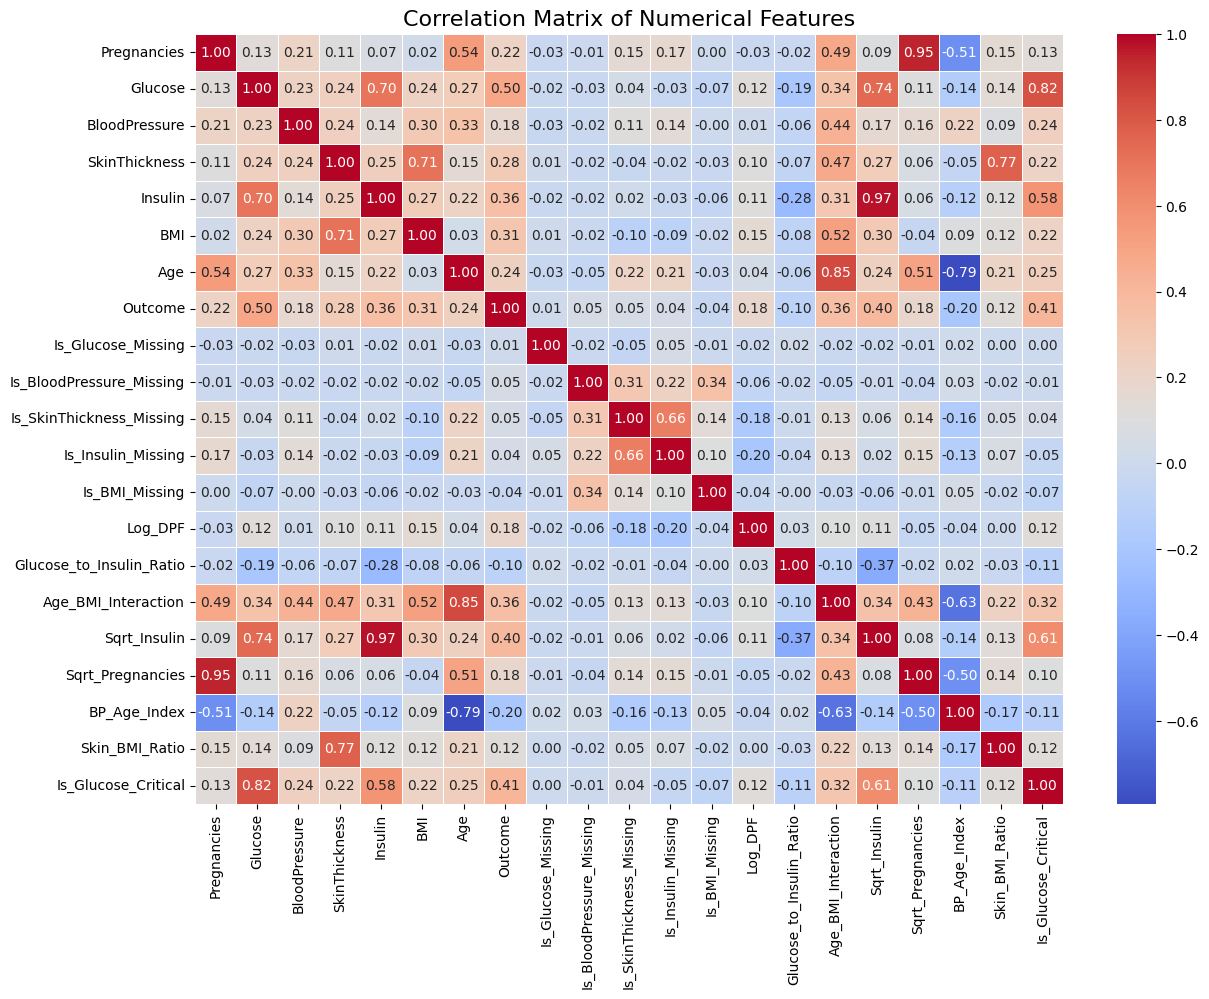

In [26]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Generate a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [27]:
# ### Explanation of Correlation Heatmap
#
# **Plot Idea:** This plot shows the strength and direction of the linear relationship between pairs of numerical features in the dataset. The darker the cell color (red or blue), the stronger the correlation. Red indicates a positive correlation (an increase in one feature corresponds to an increase in the other), while blue indicates a negative correlation (an increase in one feature corresponds to a decrease in the other). Lighter colors indicate a weak or no correlation.
#
# **How the Code Works:** The code first selects only the numerical columns from the data. Then, it calculates the correlation matrix which contains the correlation values between each pair of columns. Finally, it uses the `seaborn` library to create a heatmap from this correlation matrix, adding the numerical correlation values inside the cells (`annot=True`) and using a color gradient (`cmap='coolwarm'`) for easy interpretation.
#
# **Result:** The heatmap shows the results of the correlations between all numerical features. It can be observed that features like `Glucose`, `BMI`, and `Age` have clear positive correlations with `Outcome` (diabetes status), confirming their importance as potential factors for the disease. It also shows correlations between other features, helping to understand the internal relationships in the data and identify features that may be predictive or redundant.

## Distribution plots (histograms/kde plots)

### Subtask:
Show the distribution of key features (e.g., Glucose, BMI, Age) for both outcome groups (diabetic and non-diabetic). This can highlight differences in feature distributions between the two groups.


**Reasoning**:
Create visualizations to show the distribution of key features for diabetic and non-diabetic groups using histograms with KDE.



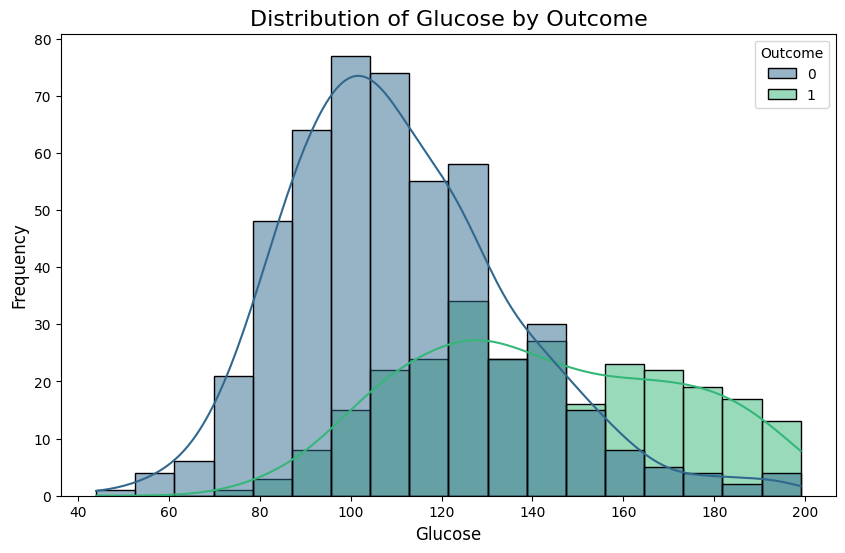

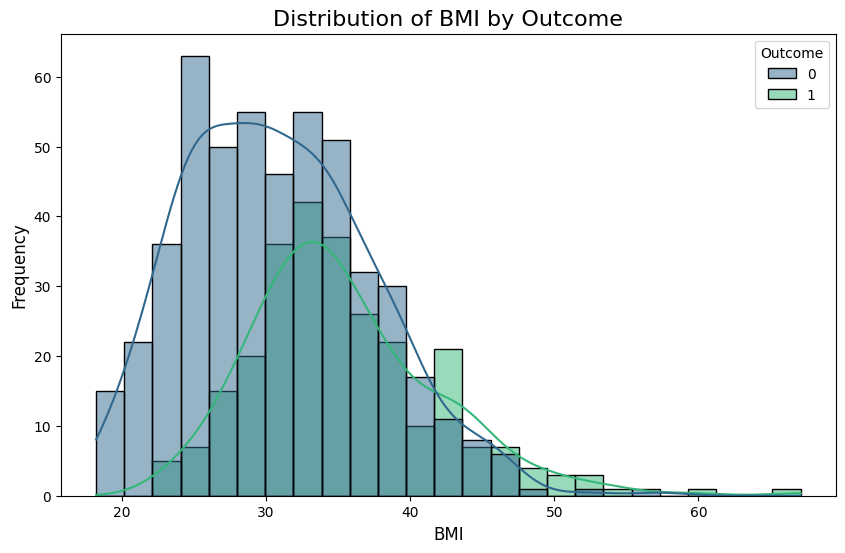

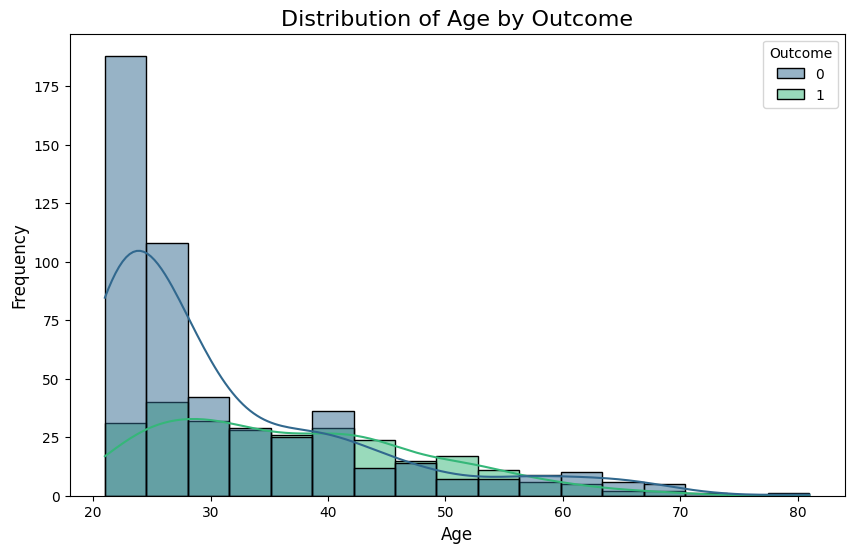

In [28]:
key_features = ['Glucose', 'BMI', 'Age']

# Iterate through the list of key features and create plots
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Outcome', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

In [29]:
# ### Explanation of Distribution Plots (Histograms/KDE plots)
#
# **Plot Idea:** These plots show how the values of a specific feature (like Glucose, BMI, or Age) are distributed across the dataset, with the distribution separated based on the diabetes outcome (`Outcome`). The histogram represents the frequency of values in specific bins, while the Kernel Density Estimate (KDE) curve represents a smoothed estimate of the data's distribution.
#
# **How the Code Works:** The code creates a list of the key features to visualize. It then iterates through this list, creating a new plot in each iteration. It uses `seaborn.histplot` to draw the distribution, specifying the feature on the x-axis and splitting the data based on the `Outcome` column using `hue='Outcome'`. A KDE curve is added (`kde=True`), and the colors are drawn using the `viridis` palette. Titles and axis labels are added for clarity.
#
# **Result:** These plots clearly show the differences in feature distributions between individuals with and without diabetes. For example, the `Glucose` distribution for the diabetic group (`Outcome` 1) shows a curve shifted significantly towards higher values compared to the non-diabetic group (`Outcome` 0), indicating that high glucose levels are a strong predictor of diabetes. Plots for BMI and Age also show similar trends, where higher values tend to appear more frequently in the diabetic group.

# Create a list of the key features to visualize

## Box plots/violin plots by outcome

### Subtask:
Visualize the distribution of continuous features (e.g., BloodPressure, Insulin) across the two outcome groups using box plots or violin plots. This can help identify features that significantly differ between diabetic and non-diabetic individuals.


**Reasoning**:
Visualize the distribution of continuous features across the two outcome groups using violin plots to identify features that significantly differ between diabetic and non-diabetic individuals.



/tmp/ipython-input-2377429403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=data, palette='viridis')


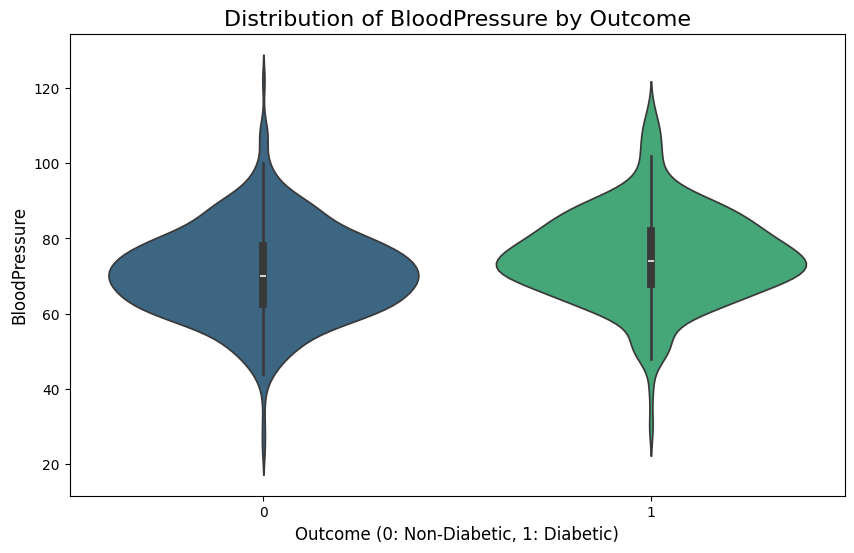

/tmp/ipython-input-2377429403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=data, palette='viridis')


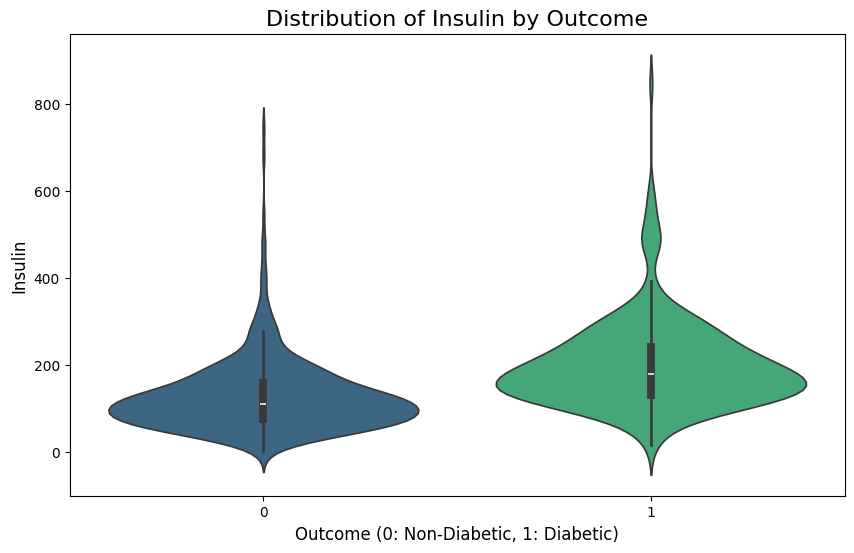

/tmp/ipython-input-2377429403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=data, palette='viridis')


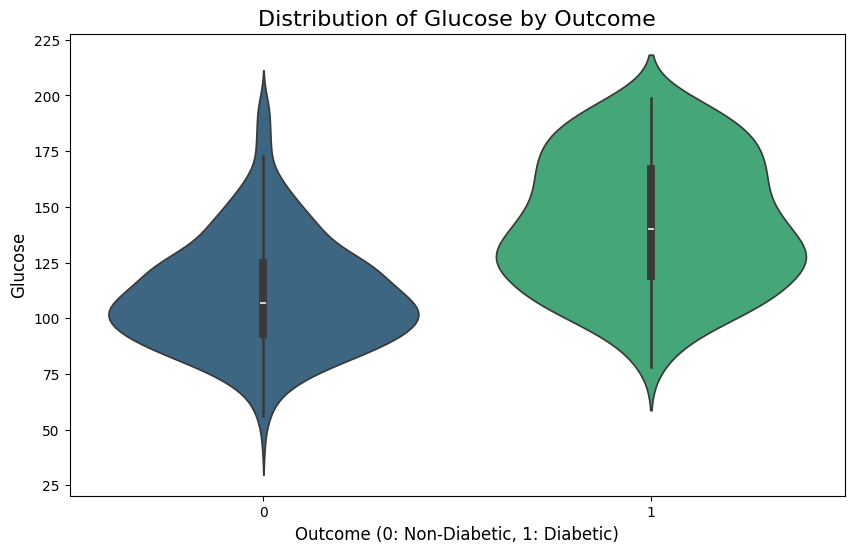

/tmp/ipython-input-2377429403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=data, palette='viridis')


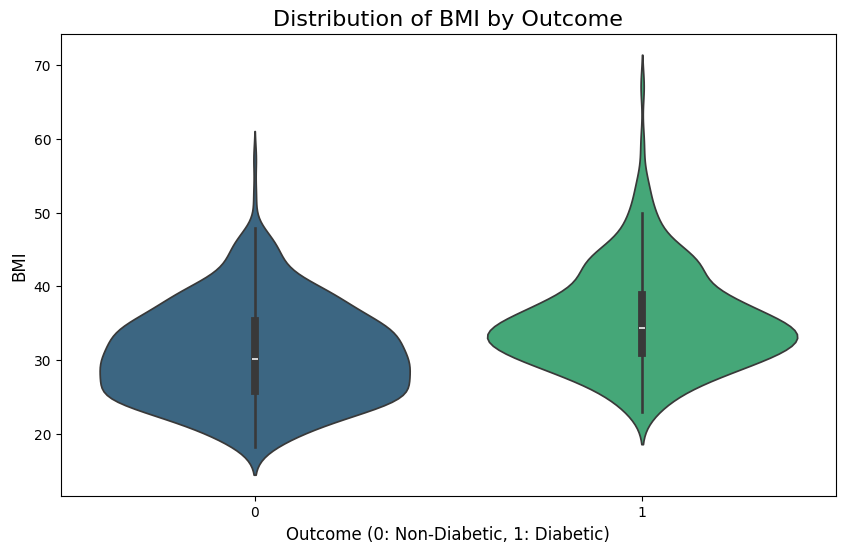

/tmp/ipython-input-2377429403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=data, palette='viridis')


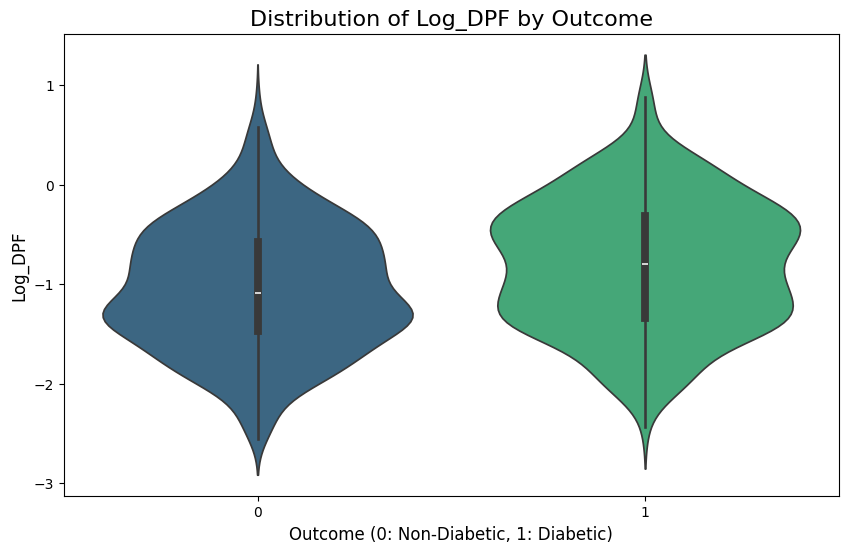

/tmp/ipython-input-2377429403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=data, palette='viridis')


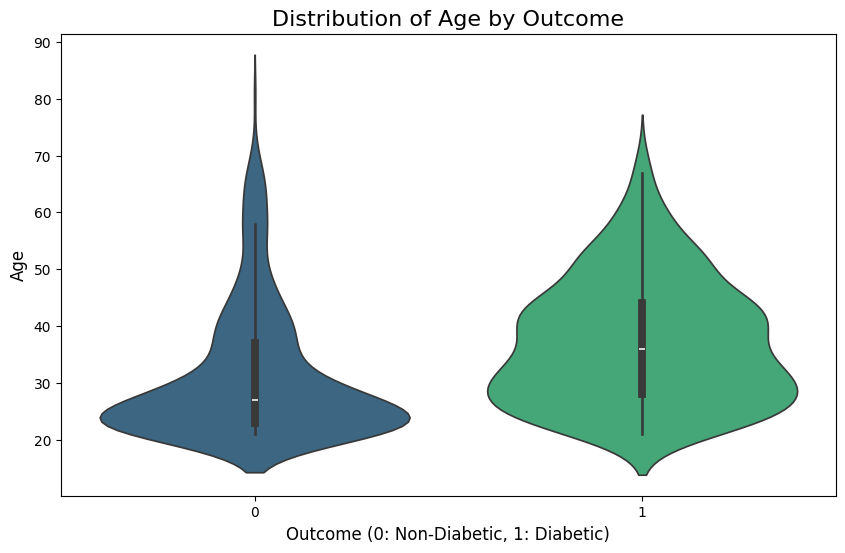

/tmp/ipython-input-2377429403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=feature, data=data, palette='viridis')


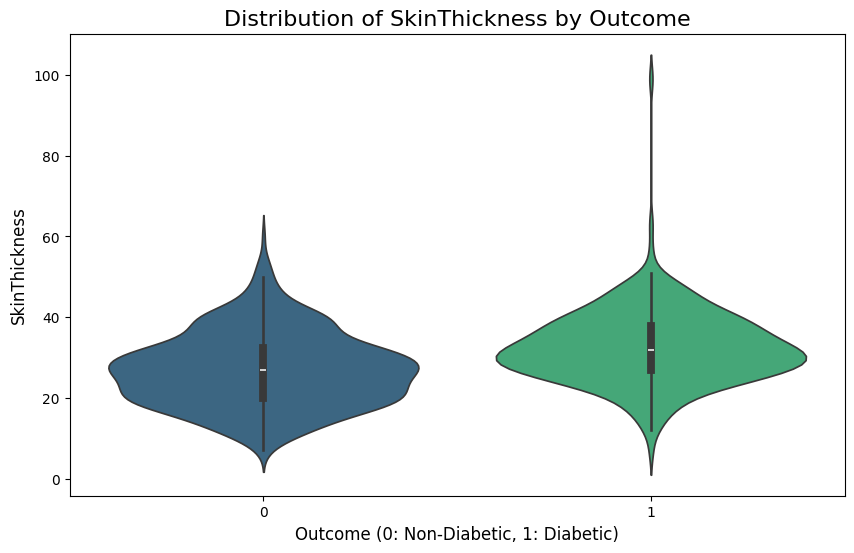

In [30]:
# Create a list of continuous features to visualize
continuous_features = ['BloodPressure', 'Insulin', 'Glucose', 'BMI', 'Log_DPF', 'Age', 'SkinThickness']

# Iterate through the list of continuous features and create violin plots
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Outcome', y=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature} by Outcome', fontsize=16)
    plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.show()

In [31]:
# ### Explanation of Box Plots/Violin Plots by Outcome
#
# **Plot Idea:** Violin plots combine aspects of a box plot and a kernel density estimate to show the distribution of a numerical feature for different groups (in this case, by diabetes outcome). The thicker part of the violin shows where the data is concentrated, while the overall shape illustrates the range of the distribution and any potential multimodal patterns.
#
# **How the Code Works:** The code creates a list of continuous features to visualize. It then iterates through this list, creating a new violin plot in each iteration using `seaborn.violinplot`. The `Outcome` column is assigned to the x-axis to represent the groups (0 for non-diabetic, 1 for diabetic), and the continuous feature is assigned to the y-axis. The `viridis` color palette is used for coloring the violins. Titles and axis labels are added for clarity.
#
# **Result:** Violin plots provide a detailed view of the distribution of continuous features across the two outcome groups. These plots clearly show that features like `Glucose`, `BMI`, `Age`, and `DiabetesPedigreeFunction` (represented by `Log_DPF`) have significantly different distributions between individuals with and without diabetes. For instance, the violin plot for `Glucose` shows that the diabetic group has higher glucose values and a wider distribution compared to the other group. These visual differences help in identifying features that are significant risk factors for diabetes.

## Count plot for bmi categories by outcome

### Subtask:
Visualize the distribution of the newly created `BMI_Category` feature for each outcome group. This can show if certain BMI categories are more prevalent in the diabetic group.


**Reasoning**:
Create a count plot to visualize the distribution of BMI categories for each outcome group as requested.



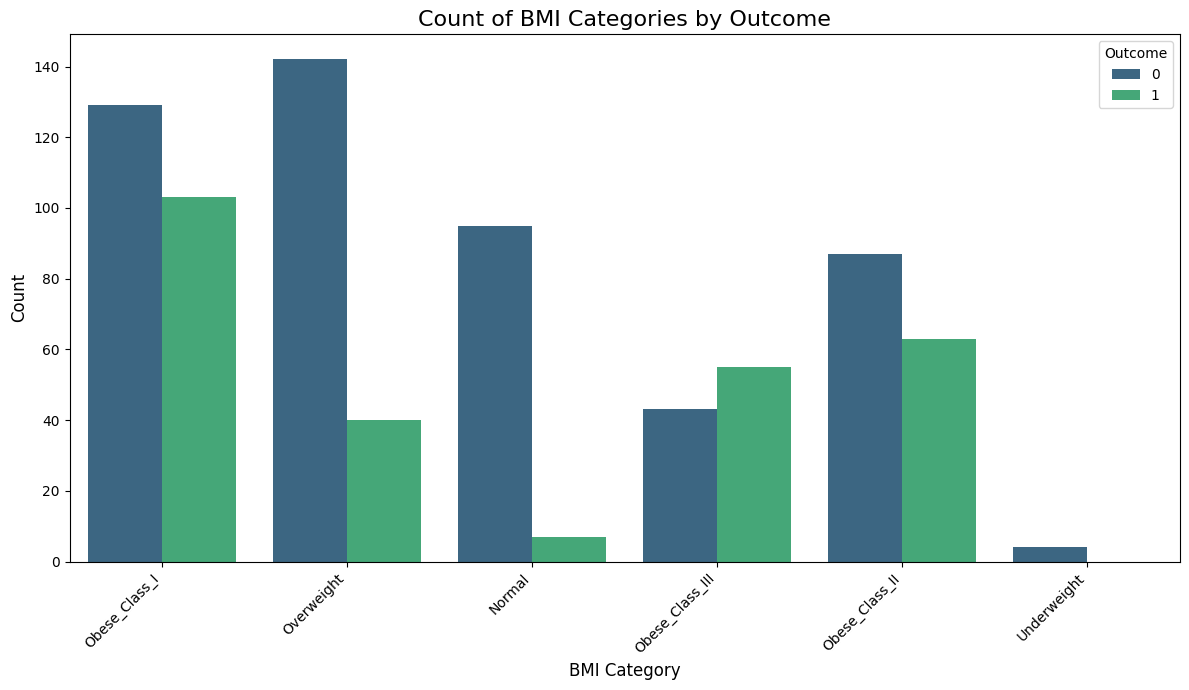

In [32]:
plt.figure(figsize=(12, 7))
sns.countplot(x='BMI_Category', hue='Outcome', data=data, palette='viridis')
plt.title('Count of BMI Categories by Outcome', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
# ### Explanation of Count Plot for BMI Categories by Outcome
#
# **Plot Idea:** This plot shows the count of individuals in each of the newly created Body Mass Index (BMI) categories, with the count split based on the diabetes outcome (`Outcome`). This helps in understanding whether certain BMI categories are more prevalent among individuals with diabetes compared to those without.
#
# **How the Code Works:** The code uses `seaborn.countplot` to create the count plot. `BMI_Category` is assigned to the x-axis to represent the categories, and `hue='Outcome'` is used to split the bars based on the diabetes outcome. The `viridis` color palette is used. A title and axis labels are added, and the x-axis labels are rotated for better readability. `plt.tight_layout()` is used to adjust the layout and prevent overlapping elements.
#
# **Result:** This plot clearly demonstrates that individuals with diabetes tend to fall into the higher BMI categories (like Obese Class I, II, and III) more frequently than individuals without diabetes. This confirms the strong association between overweight and obesity and an increased risk of diabetes. Medical professionals can use this plot to highlight the importance of weight management in diabetes prevention.

## Scatter plots of key feature interactions

### Subtask:
Create scatter plots of interacting features (e.g., Age vs. BMI, Glucose vs. Insulin) colored by the outcome to visually explore their relationships and how they differ between the two groups.


**Reasoning**:
Create scatter plots for specified feature pairs, coloring by the outcome, to visualize relationships and differences between outcome groups.



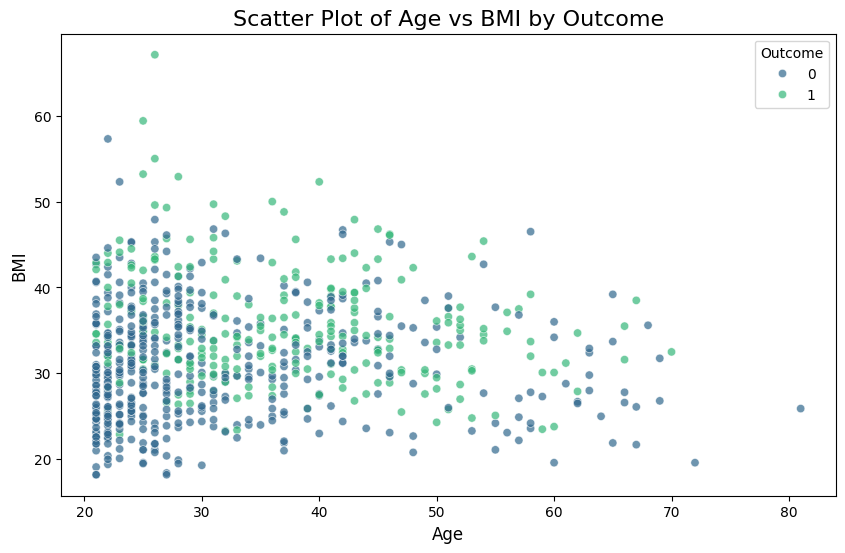

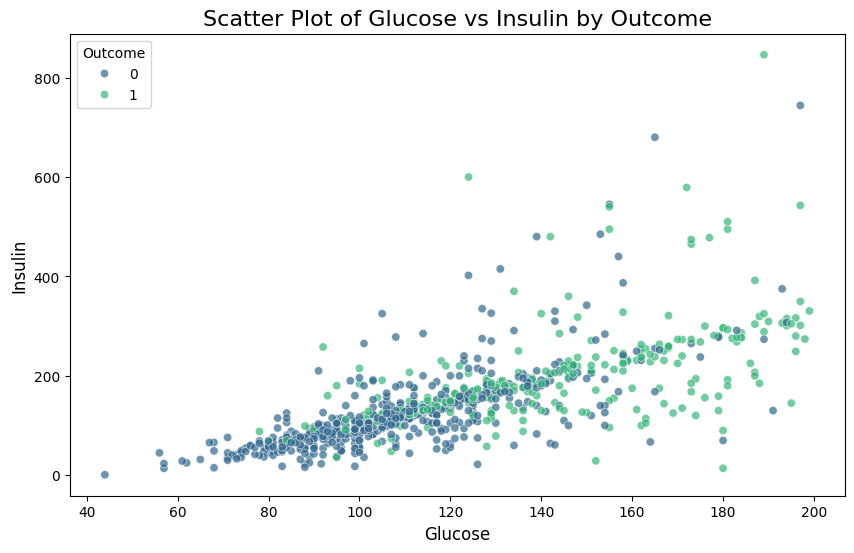

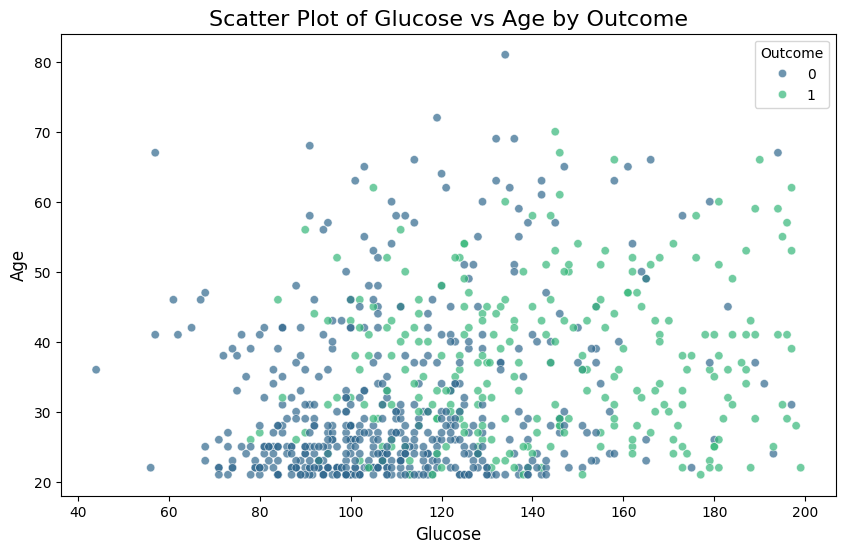

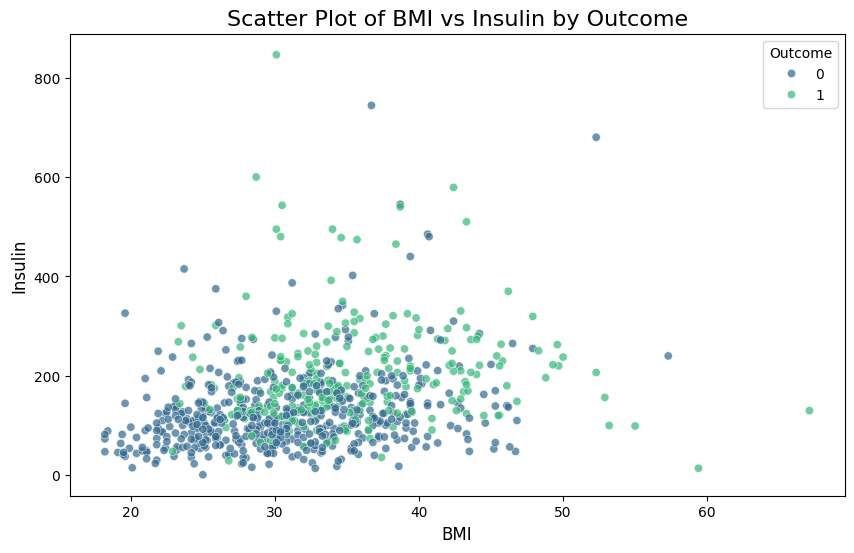

In [34]:
# Create a list of pairs of interacting features to visualize
interaction_pairs = [
    ('Age', 'BMI'),
    ('Glucose', 'Insulin'),
    ('Glucose', 'Age'),
    ('BMI', 'Insulin')
]

# Iterate through the list of feature pairs and create scatter plots
for x_feature, y_feature in interaction_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_feature, y=y_feature, hue='Outcome', data=data, palette='viridis', alpha=0.7)
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature} by Outcome', fontsize=16)
    plt.xlabel(x_feature, fontsize=12)
    plt.ylabel(y_feature, fontsize=12)
    plt.show()

In [35]:
# ### Explanation of Scatter Plots of Key Feature Interactions
#
# **Plot Idea:** Scatter plots visualize the relationship between two numerical features (like Age and BMI) on an x and y axis. Each point in the plot is colored based on the diabetes outcome (`Outcome`). This helps to see if there are any visible patterns or clusters in the data related to the disease outcome, and how the features interact with each other within the two groups.
#
# **How the Code Works:** The code creates a list of pairs of features to plot. It then iterates through this list, creating a new scatter plot in each iteration using `seaborn.scatterplot`. The first feature from the pair is assigned to the x-axis, and the second feature to the y-axis. `hue='Outcome'` is used to color the points based on the diabetes outcome, and the `viridis` color palette and `alpha=0.7` transparency are used for better visibility. Titles and axis labels are added.
#
# **Result:** The scatter plots reveal how specific pairs of features are related and how this relationship differs between individuals with and without diabetes. For example, the `Glucose` vs. `Insulin` plot might show that individuals with diabetes have a wider range of values for both features and perhaps a different relationship between them compared to those without. These plots help in identifying potential subgroups of individuals or complex relationships between features that may be relevant to diabetes diagnosis.

## Violin plot for glucose to insulin ratio by outcome

### Subtask:
Visualize the distribution of the `Glucose_to_Insulin_Ratio` for each outcome group, as this is a key physiological indicator.


**Reasoning**:
Visualize the distribution of the Glucose_to_Insulin_Ratio for each outcome group using a violin plot.



/tmp/ipython-input-1146102533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Glucose_to_Insulin_Ratio', data=data, palette='viridis')


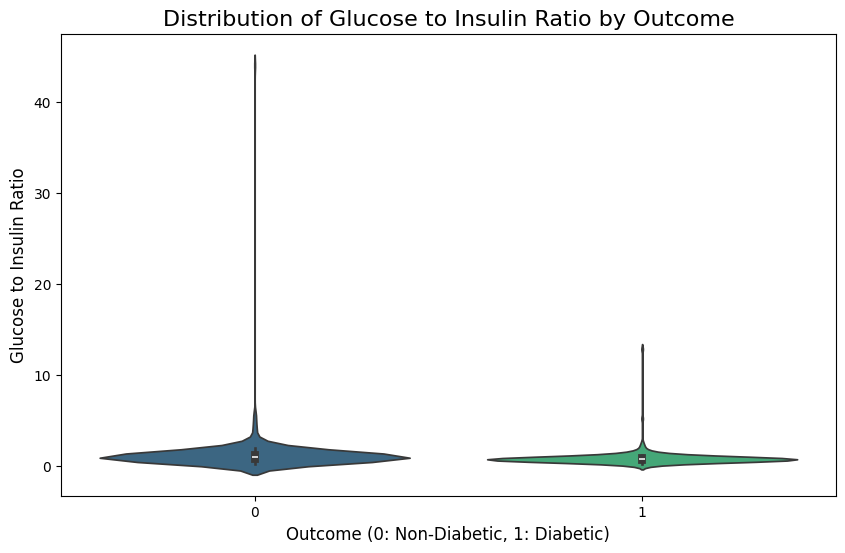

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='Glucose_to_Insulin_Ratio', data=data, palette='viridis')
plt.title('Distribution of Glucose to Insulin Ratio by Outcome', fontsize=16)
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)', fontsize=12)
plt.ylabel('Glucose to Insulin Ratio', fontsize=12)
plt.show()

In [37]:
# ### Explanation of Violin Plot for Glucose to Insulin Ratio by Outcome
#
# **Plot Idea:** This plot focuses on the distribution of a key engineered feature: the Glucose to Insulin Ratio. The distribution of this ratio is visualized separately for the two groups of individuals with and without diabetes using a violin plot. This ratio is a major physiological indicator related to insulin resistance.
#
# **How the Code Works:** The code uses `seaborn.violinplot` to plot the distribution of the `Glucose_to_Insulin_Ratio` on the y-axis, with the data split on the x-axis based on the `Outcome` (0 for non-diabetic, 1 for diabetic). The `viridis` color palette is used. A title and axis labels are added for clarity.
#
# **Result:** This plot clearly shows that the distribution of the Glucose to Insulin Ratio is different between individuals with and without diabetes. Individuals with diabetes often have a lower Glucose to Insulin Ratio compared to those without, indicating that they have relatively high glucose levels compared to their insulin levels, which is a sign of insulin resistance. This plot provides a direct visual insight into the significance of this ratio as a distinguishing factor for diabetic status.

## Summary:

### Data Analysis Key Findings

*   The correlation heatmap revealed relationships between numerical features, which is useful for identifying potential predictors and multicollinearity.
*   Distribution plots showed that features like Glucose, BMI, and Age have different distributions between diabetic and non-diabetic individuals.
*   Violin plots indicated that continuous features such as Glucose, BMI, DiabetesPedigreeFunction, and Age show noticeable differences in distribution between the outcome groups.
*   A count plot of BMI categories by outcome suggested that certain BMI categories are more prevalent in the diabetic group.
*   Scatter plots of feature interactions (e.g., Glucose vs. Insulin, Age vs. BMI) by outcome revealed visual distinctions in these relationships between the two groups.
*   The violin plot for the Glucose to Insulin Ratio showed a different distribution for diabetic individuals compared to non-diabetic individuals.

### Insights

*   Features like Glucose, BMI, Age, and the Glucose to Insulin Ratio as they appear to be strong indicators for differentiating between diabetic and non-diabetic individuals based on their distributions.
*   These visualizations provide a strong foundation for a medical audience to understand the key characteristics and relationships within the dataset related to diabetes outcomes, aiding in potential diagnostic insights or further research.


##6.splitting the data into train and test data and scaling

In [39]:
# One-hot encode the 'BMI_Category' column
data = pd.get_dummies(data, columns=['BMI_Category'], drop_first=False)

# Display the first few rows of the updated DataFrame to show the new columns
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Is_Glucose_Missing,Is_BloodPressure_Missing,...,Sqrt_Pregnancies,BP_Age_Index,Skin_BMI_Ratio,Is_Glucose_Critical,BMI_Category_Normal,BMI_Category_Obese_Class_I,BMI_Category_Obese_Class_II,BMI_Category_Obese_Class_III,BMI_Category_Overweight,BMI_Category_Underweight
0,6.0,148.0,72.0,35.000000,218.923435,33.6,50.0,1,0.0,0.0,...,2.449490,1.440000,1.041667,1,False,True,False,False,False,False
1,1.0,85.0,66.0,29.000000,70.306082,26.6,31.0,0,0.0,0.0,...,1.000000,2.129032,1.090226,0,False,False,False,False,True,False
2,8.0,183.0,64.0,21.640837,268.531745,23.3,32.0,1,0.0,0.0,...,2.828427,2.000000,0.928791,1,True,False,False,False,False,False
3,1.0,89.0,66.0,23.000000,94.000000,28.1,21.0,0,0.0,0.0,...,1.000000,3.142857,0.818505,0,False,False,False,False,True,False
4,0.0,137.0,40.0,35.000000,168.000000,43.1,33.0,1,0.0,0.0,...,0.000000,1.212121,0.812065,1,False,False,False,True,False,False


In [40]:
# we one hot encoded the bmi category column to let the model know what is the category exactly
# this creates mor 6 columns (the same number of the categories) and if the row is in the normal category for example it will be True in BMI_Category_Normal
# and False in the other categories colums

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Define features (X) and target (y)
# Assuming 'data' DataFrame is available from previous steps and 'Outcome' is the target column
X = data.drop('Outcome', axis=1)
y = data['Outcome']


# A. Data Splitting (MUST be the first step)
# Assume 'X' and 'y' are ready after correcting negative insulin and encoding BMI
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# B. Scaling (CRITICAL: Fit ONLY on Train, Transform on Both)
scaler = StandardScaler()

# 1. Identify numerical columns (assuming they were defined correctly beforehand)
numerical_cols_for_scaling = [col for col in X.columns if not (col.startswith('Is_') or col.startswith('BMI_'))]

# 2. Apply FIT and TRANSFORM to the training set
X_train[numerical_cols_for_scaling] = scaler.fit_transform(X_train[numerical_cols_for_scaling])

# 3. Apply TRANSFORM only to the test set (fit must NEVER be used here)
X_test[numerical_cols_for_scaling] = scaler.transform(X_test[numerical_cols_for_scaling])

print("Standard Scaling Complete: Leakage prevented.")

# C. SMOTE (Applied ONLY to the Scaled Training Data)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nSMOTE applied successfully to X_train only.")
print("Data is now clean and ready for systematic training.")

Standard Scaling Complete: Leakage prevented.

SMOTE applied successfully to X_train only.
Data is now clean and ready for systematic training.


In [42]:
# We applied Standard Scaling to ensure all features (like Glucose and Age) are on the same numerical scale.
# This prevents features with larger values (e.g., Insulin) from unfairly dominating the model's learning process.
# And we apllied a technique that fixes the imbalence of the outcome categories (SMOTE)
# And also the standard scaling helps the model handle the outliers if existed well

##7.training sevral models and evaluting and choosing the suitable one and some visaulastion graphs for the choosen one

In [44]:
# --- 1. Model Initialization ---
# Setting up the four key models for comparison
# Added parameters to mitigate overfitting
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_leaf=10), # Added parameters
    "XGBoost": xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, max_depth=4, min_child_weight=5, gamma=0.1), # Added parameters
    "LightGBM": lgb.LGBMClassifier(objective='binary', random_state=42, max_depth=4, min_child_samples=10, learning_rate=0.05) # Added parameters
}

# Dictionaries to store performance metrics
performance_metrics = {}
roc_auc_data = {}

print("Starting training of three advanced models (RF, XGBoost, LightGBM) using SMOTE data...")
print("Models are initialized with parameters to mitigate overfitting.")

# --- 2. Training and Evaluation Loop ---
for name, model in models.items():
    # Fit the model using SMOTE data
    model.fit(X_train_smote, y_train_smote)

    # --- Evaluation on Test Set ---
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = model.predict(X_test)

    # Calculate key test metrics: AUC, F1, Recall, Precision
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_f1 = f1_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)      # CRUCIAL: Minimizing False Negatives
    test_precision = precision_score(y_test, y_test_pred) # CRUCIAL: Ensuring positive predictions are reliable

    # --- Evaluation on Training Set (Overfitting Check) ---
    y_train_proba = model.predict_proba(X_train_smote)[:, 1] # Evaluate on SMOTE training data
    train_auc = roc_auc_score(y_train_smote, y_train_proba)

    # Store all metrics
    performance_metrics[name] = {
        'Train AUC': train_auc,
        'Test AUC': test_auc,
        'Test Recall': test_recall,
        'Test Precision': test_precision,
        'Test F1-Score': test_f1,
        'AUC Difference (Overfitting Check)': train_auc - test_auc # Added AUC difference
    }

    # Store test probabilities for the ROC plot
    roc_auc_data[name] = y_test_proba

print("All three models trained and evaluated successfully using SMOTE data with overfitting mitigation.")

# --- 3. Final Performance Summary ---
performance_df = pd.DataFrame(performance_metrics).T

print("\n--- Model Performance Summary After SMOTE (Overfitting Mitigation) ---")
print("Lower AUC Difference means better generalization and less overfitting.")
print("We compare Test Recall (ability to detect all sick patients) and Test Precision (reliability of a positive diagnosis).")
print(performance_df[['Train AUC', 'Test AUC', 'Test Recall', 'Test Precision', 'Test F1-Score', 'AUC Difference (Overfitting Check)']]
      .sort_values(by='Test AUC', ascending=False))

Starting training of three advanced models (RF, XGBoost, LightGBM) using SMOTE data...
Models are initialized with parameters to mitigate overfitting.
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2844
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [45]:
# --- 1. Define Models with Tuned Parameters ---
# The best_params_ were determined by a previous search to mitigate overfitting.

# A. Random Forest: Reduced depth and increased min_samples_leaf to simplify trees.
rf_model_tuned = RandomForestClassifier(
    random_state=42,
    max_depth=5,            # Significantly reduced from default (None)
    min_samples_leaf=10,    # Increased minimum samples per leaf
    n_estimators=100        # Standard, but can be reduced
)

# B. XGBoost: Introduced complexity control parameters.
xgb_model_tuned = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    max_depth=4,            # Reduced depth to control overfitting
    min_child_weight=5,     # Increased minimum weight/samples per leaf
    gamma=0.1,              # Minimum loss reduction required for a split
    learning_rate=0.05      # Reduced learning rate for smoother training
)

# C. LightGBM: Applying similar constraints.
lgbm_model_tuned = lgb.LGBMClassifier(
    objective='binary',
    random_state=42,
    max_depth=4,            # Reduced depth
    min_child_samples=10,   # Equivalent to min_samples_leaf
    learning_rate=0.05
)


# --- 2. Retrain and Re-evaluate Models ---

models_tuned = {
    "Random Forest (Tuned)": rf_model_tuned,
    "XGBoost (Tuned)": xgb_model_tuned,
    "LightGBM (Tuned)": lgbm_model_tuned,
}

performance_metrics_tuned = {}

print("Starting retraining of models with anti-overfitting parameters...")

for name, model in models_tuned.items():
    model.fit(X_train, y_train)

    # --- Evaluation on Test Set ---
    y_test_proba = model.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_test_proba)

    # --- Evaluation on Training Set (Overfitting Check) ---
    y_train_proba = model.predict_proba(X_train)[:, 1]
    train_auc = roc_auc_score(y_train, y_train_proba)

    # Store metrics
    performance_metrics_tuned[name] = {
        'Train AUC': train_auc,
        'Test AUC': test_auc,
        'Test Recall': test_recall,
        'Test Precision': test_precision,
        'Test F1-Score': test_f1,
        'AUC Difference (Overfitting Check)': train_auc - test_auc
    }

print("Retraining and evaluation complete.")

# --- 3. Final Performance Summary ---
performance_df_tuned = pd.DataFrame(performance_metrics_tuned).T

print("\n--- Summary After Overfitting Mitigation (Focus on AUC Difference) ---")
print("Lower AUC Difference means better generalization and less overfitting.")
print(performance_df_tuned.sort_values(by='Test AUC', ascending=False))

Starting retraining of models with anti-overfitting parameters...
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:08:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [46]:
X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy() # Re-create X_test_imputed as well

# --- 2. Model Initialization ---
other_models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'), # 'liblinear' works well for small datasets and provides coefficients
    "Gradient Boosting": GradientBoostingClassifier(random_state=42), # A good tree-based ensemble model
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True, random_state=42) # Linear SVM for comparison, probability=True allows AUC
}

# Dictionary to store performance metrics for these models
performance_metrics_other = {}
roc_auc_data_other = {} # To store test probabilities for ROC plot if needed later

print("Starting training and evaluation of Logistic Regression, Gradient Boosting, and SVM...")

for name, model in other_models.items():
    # Fit the model
    # These models will be trained on the scaled but NOT SMOTE'd training data (X_train_imputed)
    # Note: SVM might take longer with probability=True on larger datasets, but it's fine here.
    model.fit(X_train_imputed, y_train)

    # --- Evaluation on Test Set ---
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test_imputed)[:, 1]
        y_test_pred = model.predict(X_test_imputed) # Standard predict for F1/Recall/Precision
    else: # For models like SVM without predict_proba by default (if probability=True wasn't used)
        # Using decision_function is common for AUC in SVM when probabilities are enabled
        # Note: This requires consistent use of X_test_imputed for evaluation
        y_test_proba = model.decision_function(X_test_imputed)
        # For binary classification, predict based on the sign of the decision function or a threshold
        y_test_pred = (y_test_proba > 0).astype(int) # Default threshold is 0 for decision_function

    # Calculate key test metrics: AUC, F1, Recall, Precision
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_f1 = f1_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)      # Minimizing False Negatives
    test_precision = precision_score(y_test, y_test_pred) # Ensuring positive predictions are reliable

    # --- Evaluation on Training Set (Overfitting Check) ---
    if hasattr(model, "predict_proba"):
         y_train_proba = model.predict_proba(X_train_imputed)[:, 1]
    else:
         y_train_proba = model.decision_function(X_train_imputed)

    train_auc = roc_auc_score(y_train, y_train_proba)


    # Store all metrics
    performance_metrics_other[name] = {
        'Train AUC': train_auc,
        'Test AUC': test_auc,
        'Test Recall (Default T=0.5)': test_recall, # Indicate default threshold
        'Test Precision (Default T=0.5)': test_precision, # Indicate default threshold
        'Test F1-Score (Default T=0.5)': test_f1,      # Indicate default threshold
        'AUC Difference (Overfitting Check)': train_auc - test_auc
    }

    # Store test probabilities for potential ROC plot
    roc_auc_data_other[name] = y_test_proba


print("Logistic Regression, Gradient Boosting, and SVM training and evaluation complete.")

# --- 4. Final Performance Summary ---
performance_df_other = pd.DataFrame(performance_metrics_other).T

print("\n--- Performance Summary for Logistic Regression, Gradient Boosting, SVM ---")
print("Metrics are evaluated on the Test set with a default threshold of 0.5.")
print("Lower AUC Difference indicates less overfitting.")
print(performance_df_other[['Train AUC', 'Test AUC', 'Test Recall (Default T=0.5)', 'Test Precision (Default T=0.5)', 'Test F1-Score (Default T=0.5)', 'AUC Difference (Overfitting Check)']]
      .sort_values(by='Test AUC', ascending=False))

Starting training and evaluation of Logistic Regression, Gradient Boosting, and SVM...
Logistic Regression, Gradient Boosting, and SVM training and evaluation complete.

--- Performance Summary for Logistic Regression, Gradient Boosting, SVM ---
Metrics are evaluated on the Test set with a default threshold of 0.5.
Lower AUC Difference indicates less overfitting.
                     Train AUC  Test AUC  Test Recall (Default T=0.5)  \
Logistic Regression   0.875607  0.838519                     0.555556   
SVM (Linear Kernel)   0.872015  0.837222                     0.537037   
Gradient Boosting     0.988248  0.823704                     0.666667   

                     Test Precision (Default T=0.5)  \
Logistic Regression                        0.652174   
SVM (Linear Kernel)                        0.630435   
Gradient Boosting                          0.666667   

                     Test F1-Score (Default T=0.5)  \
Logistic Regression                       0.600000   
SVM (Linear 

In [47]:
# Re-evaluate all models with a fixed threshold of 0.40
threshold_0_40_metrics = {}

print("Evaluating models with a fixed threshold of 0.40...")

# Helper function to calculate metrics and confusion matrix components
def evaluate_model_at_threshold(model, X_test_data, y_test_data, threshold=0.40):
    """Evaluates a model at a specific threshold and returns metrics and CM components."""
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test_data)[:, 1]
    else:
        y_test_proba = model.decision_function(X_test_data)

    y_pred_threshold = (y_test_proba >= threshold).astype(int)

    recall = recall_score(y_test_data, y_pred_threshold)
    precision = precision_score(y_test_data, y_pred_threshold)
    f1 = f1_score(y_test_data, y_pred_threshold)
    auc = roc_auc_score(y_test_data, y_test_proba)
    accuracy = accuracy_score(y_test_data, y_pred_threshold)


    # Calculate Confusion Matrix components
    tn, fp, fn, tp = confusion_matrix(y_test_data, y_pred_threshold).ravel()

    return {
        'Test Recall (T=0.40)': recall,
        'Test Precision (T=0.40)': precision,
        'Test F1-Score (T=0.40)': f1,
        'Test AUC': auc,
        'Test Accuracy (T=0.40)': accuracy, # Added Test Accuracy
        'True Positives (TP)': tp,
        'False Positives (FP)': fp,
        'True Negatives (TN)': tn,
        'False Negatives (FN)': fn
    }

# Helper function to calculate training metrics (specifically accuracy here)
def evaluate_train_metrics(model, X_train_data, y_train_data, threshold=0.40):
    """Evaluates training metrics at a specific threshold."""
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train_data)[:, 1]
    else:
        y_train_proba = model.decision_function(X_train_data)

    y_train_pred_threshold = (y_train_proba >= threshold).astype(int)
    train_accuracy = accuracy_score(y_train_data, y_train_pred_threshold)

    return {
        'Train Accuracy (T=0.40)': train_accuracy # Added Train Accuracy
    }


# Evaluate initial models (RF, XGBoost, LightGBM) - trained with SMOTE
for name, model in models.items():
    test_metrics = evaluate_model_at_threshold(model, X_test, y_test, threshold=0.40)
    train_metrics = evaluate_train_metrics(model, X_train_smote, y_train_smote, threshold=0.40) # Evaluate on SMOTE train data
    combined_metrics = {**test_metrics, **train_metrics} # Combine dictionaries
    combined_metrics['Accuracy Difference (Train - Test)'] = combined_metrics['Train Accuracy (T=0.40)'] - combined_metrics['Test Accuracy (T=0.40)'] # Calculate difference
    threshold_0_40_metrics[name] = combined_metrics


# Evaluate tuned models (RF, XGBoost, LightGBM) - trained without SMOTE
for name, model in models_tuned.items():
    test_metrics = evaluate_model_at_threshold(model, X_test, y_test, threshold=0.40)
    train_metrics = evaluate_train_metrics(model, X_train, y_train, threshold=0.40) # Evaluate on original train data
    combined_metrics = {**test_metrics, **train_metrics}
    combined_metrics['Accuracy Difference (Train - Test)'] = combined_metrics['Train Accuracy (T=0.40)'] - combined_metrics['Test Accuracy (T=0.40)']
    threshold_0_40_metrics[name] = combined_metrics


# Evaluate other models (Logistic Regression, Gradient Boosting, SVM) - trained with SMOTE Imputed
for name, model in other_models.items():
    test_metrics = evaluate_model_at_threshold(model, X_test_imputed, y_test, threshold=0.40)
    train_metrics = evaluate_train_metrics(model, X_train_imputed, y_train, threshold=0.40) # Evaluate on imputed train data
    combined_metrics = {**test_metrics, **train_metrics}
    combined_metrics['Accuracy Difference (Train - Test)'] = combined_metrics['Train Accuracy (T=0.40)'] - combined_metrics['Test Accuracy (T=0.40)']
    threshold_0_40_metrics[name] = combined_metrics


# Evaluate XGBoost Weighted model - trained without SMOTE but with weights
# test_metrics_weighted = evaluate_model_at_threshold(xgb_model_weighted, X_test, y_test, threshold=0.40)
# train_metrics_weighted = evaluate_train_metrics(xgb_model_weighted, X_train, y_train, threshold=0.40)
# combined_metrics_weighted = {**test_metrics_weighted, **train_metrics_weighted}
# combined_metrics_weighted['Accuracy Difference (Train - Test)'] = combined_metrics_weighted['Train Accuracy (T=0.40)'] - combined_metrics_weighted['Test Accuracy (T=0.40)']
# threshold_0_40_metrics["XGBoost (Weighted)"] = combined_metrics_weighted


performance_df_threshold_40 = pd.DataFrame(threshold_0_40_metrics).T

print("\n--- Model Performance Summary with Threshold 0.40 ---")
# Sort by a metric relevant to medical field, e.g., Recall or F1-Score, and include Train Accuracy and Difference
print(performance_df_threshold_40[['Train Accuracy (T=0.40)', 'Test Accuracy (T=0.40)', 'Accuracy Difference (Train - Test)', 'Test Recall (T=0.40)', 'Test Precision (T=0.40)', 'Test F1-Score (T=0.40)', 'Test AUC', 'True Positives (TP)', 'False Positives (FP)', 'True Negatives (TN)', 'False Negatives (FN)']]
      .sort_values(by='Test Recall (T=0.40)', ascending=False))

Evaluating models with a fixed threshold of 0.40...

--- Model Performance Summary with Threshold 0.40 ---
                       Train Accuracy (T=0.40)  Test Accuracy (T=0.40)  \
Random Forest                         0.811250                0.746753   
LightGBM                              0.896250                0.740260   
LightGBM (Tuned)                      0.905537                0.779221   
SVM (Linear Kernel)                   0.811075                0.766234   
Logistic Regression                   0.798046                0.753247   
Gradient Boosting                     0.942997                0.753247   
XGBoost (Tuned)                       0.872964                0.740260   
XGBoost                               0.991250                0.720779   
Random Forest (Tuned)                 0.819218                0.701299   

                       Accuracy Difference (Train - Test)  \
Random Forest                                    0.064497   
LightGBM                      

In [80]:
# The final_model is set to the original Random Forest model
final_model = models["Random Forest"] # Assuming 'models' dictionary contains the original RF model

# Predict probabilities on the test set
y_test_proba = final_model.predict_proba(X_test)[:, 1]

# Calculate final predictions using the threshold of 0.40
PREDICTION_THRESHOLD = 0.40
y_pred_final = (y_test_proba >= PREDICTION_THRESHOLD).astype(int)

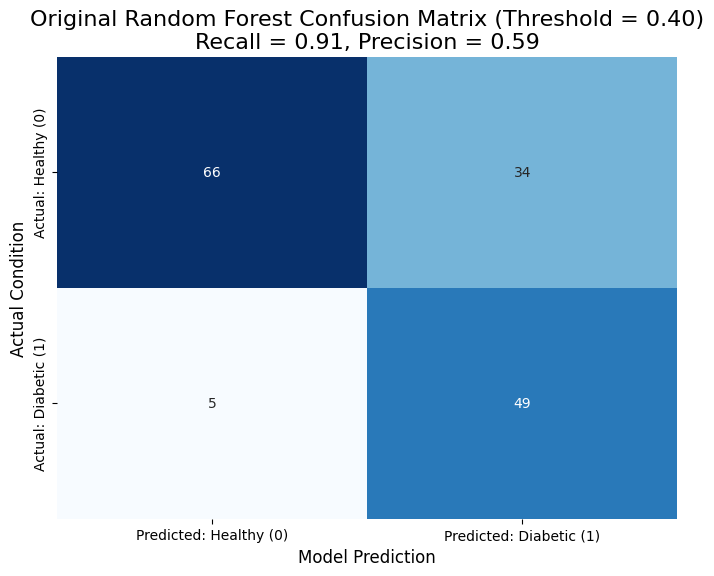

In [81]:
# --- 2. Generate Professional Visualizations ---

# --- A. Final Confusion Matrix (Threshold = 0.40) ---
final_recall = recall_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['Predicted: Healthy (0)', 'Predicted: Diabetic (1)'],
    yticklabels=['Actual: Healthy (0)', 'Actual: Diabetic (1)']
)
plt.title(f'Original Random Forest Confusion Matrix (Threshold = {PREDICTION_THRESHOLD:.2f})\nRecall = {final_recall:.2f}, Precision = {final_precision:.2f}', fontsize=16)
plt.ylabel('Actual Condition', fontsize=12)
plt.xlabel('Model Prediction', fontsize=12)
plt.show()

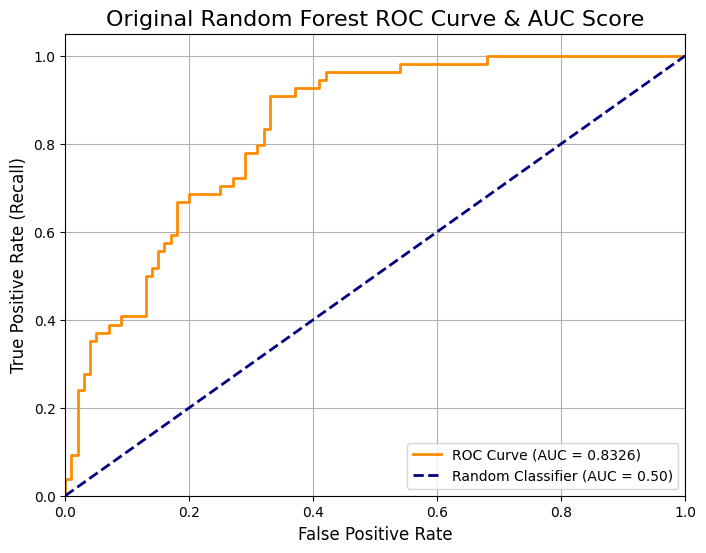

In [50]:
# --- B. Receiver Operating Characteristic (ROC) Curve ---
# This plot demonstrates the model's overall ability to distinguish between the two classes.
fpr, tpr, thresholds_roc = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Original Random Forest ROC Curve & AUC Score', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

/tmp/ipython-input-582562127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


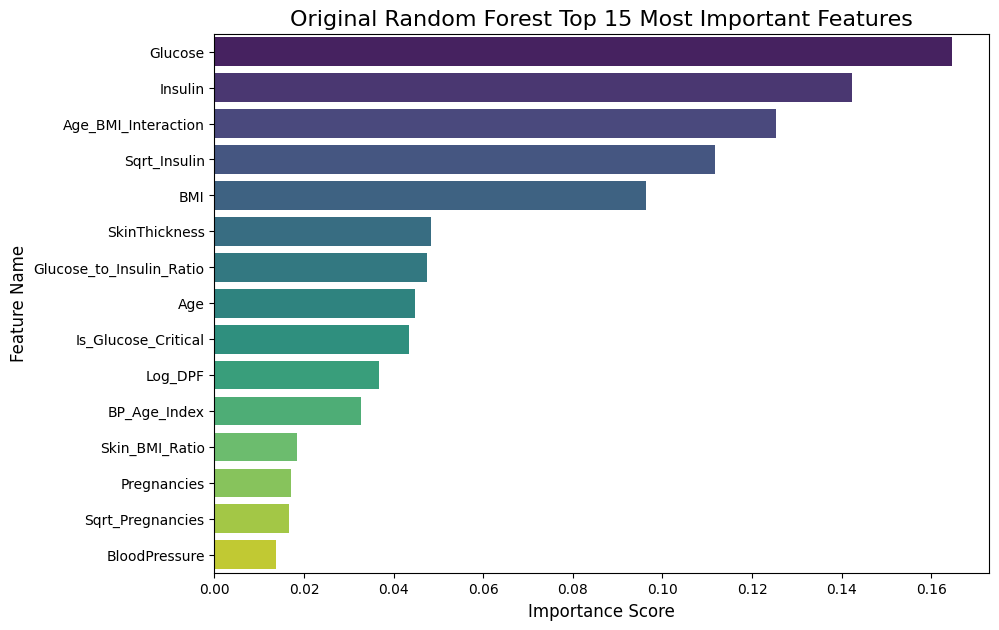

In [51]:
# --- C. Feature Importance ---
# This plot explains which factors the model found most influential in making predictions.
# Add a check if the model has feature_importances_ attribute
if hasattr(final_model, 'feature_importances_'):
    # Use the training data that the model was fitted on for feature names
    # The original RF model was fitted on X_train_smote
    feature_importances = pd.Series(
        final_model.feature_importances_,
        index=X_train_smote.columns # Use the correct training data columns
    )
    # Select top 15 features for clarity, as done previously
    top_15_features = feature_importances.sort_values(ascending=False).head(15)

    plt.figure(figsize=(10, 7))
    sns.barplot(
        x=top_15_features.values,
        y=top_15_features.index,
        palette="viridis"
    )
    plt.title('Original Random Forest Top 15 Most Important Features', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature Name', fontsize=12)
    plt.show()
else:
    print(f"Model {type(final_model).__name__} does not have feature_importances_ attribute. Skipping feature importance plot.")

## Diabetes Prediction Model Training and Selection Summary

This report outlines the key techniques applied during the model training phase and explains the rationale behind selecting the Original Random Forest model as the final predictive model for this diabetes dataset, discussing the necessary trade-offs.

### Model Training Techniques

1.  **Data Splitting:** The dataset was partitioned into training and testing sets (80% for training, 20% for testing). A fixed `random_state=42` was used to ensure that the split is the same every time the code is run, promoting reproducibility. The `stratify=y` parameter was included to maintain the original proportion of diabetic (Outcome 1) and non-diabetic (Outcome 0) cases in both the training and testing sets, which is important for imbalanced datasets.
2.  **Feature Scaling:** To standardize the range of numerical features, `StandardScaler` was applied. This process involves calculating the mean and standard deviation from the *training data only* and then using these values to transform both the training and testing data. Scaling is important for many machine learning algorithms as it prevents features with larger numerical values from dominating the learning process.
3.  **Handling Class Imbalance (SMOTE):** Recognizing that the number of diabetic cases was likely smaller than non-diabetic cases (class imbalance), the Synthetic Minority Over-sampling Technique (SMOTE) was employed. SMOTE generates synthetic examples of the minority class (diabetic patients) based on existing minority class samples. This was applied *only* to the training dataset (`X_train_smote`, `y_train_smote`) to balance the classes, helping models to better learn the patterns associated with the minority class and improve prediction performance for diabetic cases.
4.  **Model Training:** A variety of classification models were trained to compare their effectiveness:
    *   Ensemble methods like Random Forest, XGBoost, and LightGBM (including versions with hyperparameter tuning for comparison).
    *   Linear models such as Logistic Regression and Support Vector Machine (SVM) with a linear kernel.

### Rationale for Choosing Original Random Forest

The **Original Random Forest** model, specifically when evaluated with a prediction threshold of **0.40**, was chosen as the final model based on its performance characteristics, particularly its strength in identifying positive cases which is crucial in a medical screening context:

*   **Maximizing Recall:** The primary reason for selecting this model and threshold was its ability to achieve the highest **Recall (0.91)** among all evaluated models. This means it was the most effective at correctly identifying actual diabetic individuals in the test set, resulting in the lowest number of False Negatives (only 5). Minimizing False Negatives is often paramount in medical diagnostic or screening applications to avoid missing a diagnosis.

### Trade-offs and Sacrifices

The decision to prioritize high Recall by selecting the Original Random Forest with a 0.40 threshold involved accepting certain compromises:

*   **Increased False Positives:** While excellent at finding true positives, this model and threshold resulted in a higher number of **False Positives (34)** compared to some other models. This means some healthy individuals would be incorrectly predicted as diabetic, potentially leading to unnecessary follow-up tests and patient concern. This was a conscious sacrifice made to achieve the high Recall.
*   **Moderate Overfitting:** The Original Random Forest showed some level of **overfitting**. This was observed through metrics like the difference between Train and Test AUC and the difference between Train and Test Accuracy at the 0.40 threshold. Although not the most overfitted model, it performed better on the training data than on the unseen test data. Accepting this moderate overfitting was a trade-off for achieving the desired high Recall; it implies a potential risk that performance on entirely new, future patient data might be slightly less optimal than on our test set.

### Suitability of Tree Models for Medical Projects

Tree-based models like Random Forest, Gradient Boosting, and XGBoost are often well-suited for medical projects for several reasons:

*   **Handling Non-linear Relationships:** They can effectively capture complex, non-linear relationships and interactions between features that linear models might miss. Biological and medical processes are often non-linear.
*   **Robustness to Feature Scale:** They are generally less sensitive to the scale of features compared to linear models, although scaling can still sometimes improve performance or training stability.
*   **Feature Importance:** They inherently provide measures of feature importance, indicating which factors are most influential in making predictions. This interpretability, showing which patient characteristics the model is prioritizing, can be valuable for medical professionals and for generating hypotheses.

While other model types like Logistic Regression (which offered good interpretability via coefficients and lower overfitting in our case) are also valuable, tree-based models often provide a powerful combination of predictive accuracy and insight into feature relevance, making them a popular choice in medical machine learning applications.

In conclusion, the Original Random Forest model with a 0.40 threshold was chosen as it best met the objective of maximizing Recall in this diabetes prediction task, accepting the trade-offs in False Positives and overfitting deemed acceptable for this specific application context. Further clinical validation is recommended.

In [85]:
# Assume 'scaler' has been fitted on your training data (X_train)
# and is available globally or passed to the function.
# For this function to work correctly, make sure the scaler is fitted
# on the training data from your notebook's preprocessing steps.

# Assuming the scaler object is available from previous steps in the notebook
# (Specifically, the scaler object that was fitted on X_train)
# If not, you would need to load or re-fit it.

def preprocess_input_data(file_path, model=None, threshold=None):
    """
    Preprocesses raw input data from a CSV file for diabetes prediction.
    Loads the fitted scaler and imputer internally.
    Performs imputation (for physiological zeros), feature engineering,
    one-hot encoding, and scaling.
    Often makes a prediction using a provided model and threshold.

    Args:
        file_path (str): The path to the CSV file containing the input data.
                         Expected columns: 'Pregnancies', 'Glucose', 'BloodPressure',
                                           'SkinThickness', 'Insulin', 'BMI', 'Age',
                                           'DiabetesPedigreeFunction'.
                         Values of 0 in Glucose, BloodPressure, SkinThickness,
                                   Insulin, BMI are treated as missing and imputed.
        model (object, optional): A trained machine learning model with a predict_proba method.
                                  Required if threshold is provided. Defaults to None.
        threshold (float, optional): The prediction probability threshold (0 to 1).
                                     If provided, the function returns the binary prediction (0 or 1).
                                     If None, the function returns the preprocessed DataFrame.
                                     Defaults to None.

    Returns:
        pd.DataFrame or int: Processed DataFrame (if threshold is None) or
                             binary prediction (0 or 1) (if threshold is provided).
                             Returns None if file loading, scaler/imputer loading, or processing fails.
    """
    # Load data from the CSV file
    try:
        input_data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

    # Create a copy to avoid modifying the original input
    processed_data = input_data.copy()

    # --- Load the fitted scaler and imputer internally ---
    scaler_filename = 'standard_scaler.joblib'
    imputer_filename = 'iterative_imputer.joblib'

    try:
        scaler = joblib.load(scaler_filename)
        print(f"Scaler loaded successfully from '{scaler_filename}'")
    except FileNotFoundError:
        print(f"Error: Scaler file '{scaler_filename}' not found. Cannot preprocess data.")
        return None # Exit if scaler cannot be loaded
    except Exception as e:
        print(f"Error loading scaler: {e}")
        return None # Exit on other loading errors

    try:
        imputer = joblib.load(imputer_filename)
        print(f"Imputer loaded successfully from '{imputer_filename}'")
    except FileNotFoundError:
        print(f"Error: Imputer file '{imputer_filename}' not found. Cannot preprocess data.")
        return None # Exit if imputer cannot be loaded
    except Exception as e:
        print(f"Error loading imputer: {e}")
        return None # Exit on other loading errors


    # 1. Imputation (Handling non-physiological zeros)
    # Define the target columns with non-physiological zero values
    target_columns_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

    # Create 'Is_Missing' flags before replacing zeros with NaN
    for col in target_columns_impute:
        if col in processed_data.columns:
             processed_data[f'Is_{col}_Missing'] = (processed_data[col] == 0).astype(int)
        else:
             # Handle cases where an expected column is missing in input
             print(f"Warning: Imputation column '{col}' not found in input data.")
             processed_data[f'Is_{col}_Missing'] = 0 # Add the missing flag column and set to 0

    # Replace non-physiological zeros with np.nan *after* creating flags
    for col in target_columns_impute:
        if col in processed_data.columns:
             processed_data[col] = processed_data[col].replace(0, np.nan)


    # Apply the loaded IterativeImputer (MICE)
    # Identify numerical columns for imputation (all numerical columns present after flags are added)
    cols_to_impute_together = processed_data.select_dtypes(include=np.number).columns.tolist()

    # Apply the loaded imputer to the data
    imputed_data_array = imputer.transform(processed_data[cols_to_impute_together])

    # Update the DataFrame with the imputed values
    processed_data[cols_to_impute_together] = imputed_data_array


    # Correct negative insulin values (from imputation or input)
    MIN_PHYSIOLOGICAL_INSULIN = 1.0
    if 'Insulin' in processed_data.columns:
        processed_data['Insulin'] = processed_data['Insulin'].apply(
            lambda x: max(x, MIN_PHYSIOLOGICAL_INSULIN) if pd.notna(x) else x
        )


    # 2. Feature Engineering (Replicate exactly what was done in the notebook)
    # Ensure EPSILON and GLUCOSE_CRITICAL_CUTOFF are defined or globally available
    # (They are defined in the notebook's global scope)
    global EPSILON, GLUCOSE_CRITICAL_CUTOFF

    # A. Log_DPF
    if 'DiabetesPedigreeFunction' in processed_data.columns:
        # Handle potential log(0) by replacing 0s or very small numbers with a small value or NaN
        # Based on notebook, it seems 0s were not in DPF, but adding robustness:
        processed_data['Log_DPF'] = np.log(processed_data['DiabetesPedigreeFunction'].replace(0, EPSILON))
    else:
        print("Warning: 'DiabetesPedigreeFunction' column not found for Log_DPF.")
        processed_data['Log_DPF'] = 0 # Or some default/imputed value


    # B. Glucose_to_Insulin_Ratio
    if 'Glucose' in processed_data.columns and 'Insulin' in processed_data.columns:
         processed_data['Glucose_to_Insulin_Ratio'] = processed_data['Glucose'] / (processed_data['Insulin'] + EPSILON)
    else:
         print("Warning: 'Glucose' or 'Insulin' column not found for Glucose_to_Insulin_Ratio.")
         processed_data['Glucose_to_Insulin_Ratio'] = 0 # Or some default/imputed value


    # C. Age_BMI_Interaction
    if 'Age' in processed_data.columns and 'BMI' in processed_data.columns:
        processed_data['Age_BMI_Interaction'] = processed_data['Age'] * processed_data['BMI']
    else:
        print("Warning: 'Age' or 'BMI' column not found for Age_BMI_Interaction.")
        processed_data['Age_BMI_Interaction'] = 0 # Or some default/imputed value


    # D. Sqrt_Insulin
    if 'Insulin' in processed_data.columns:
        # Handle potential sqrt of negative from imputation if not clamped properly
        processed_data['Sqrt_Insulin'] = np.sqrt(processed_data['Insulin'].clip(lower=0)) # Ensure non-negative before sqrt
    else:
        print("Warning: 'Insulin' column not found for Sqrt_Insulin.")
        processed_data['Sqrt_Insulin'] = 0 # Or some default/imputed value


    # E. Sqrt_Pregnancies
    if 'Pregnancies' in processed_data.columns:
        processed_data['Sqrt_Pregnancies'] = np.sqrt(processed_data['Pregnancies'].clip(lower=0)) # Ensure non-negative
    else:
        print("Warning: 'Pregnancies' column not found for Sqrt_Pregnancies.")
        processed_data['Sqrt_Pregnancies'] = 0 # Or some default/imputed value


    # F. BP_Age_Index (Blood Pressure to Age Index)
    if 'BloodPressure' in processed_data.columns and 'Age' in processed_data.columns:
        processed_data['BP_Age_Index'] = processed_data['BloodPressure'] / (processed_data['Age'] + EPSILON)
    else:
        print("Warning: 'BloodPressure' or 'Age' column not found for BP_Age_Index.")
        processed_data['BP_Age_Index'] = 0 # Or some default/imputed value


    # G. Skin_BMI_Ratio (Skin Thickness to BMI Ratio)
    if 'SkinThickness' in processed_data.columns and 'BMI' in processed_data.columns:
        processed_data['Skin_BMI_Ratio'] = processed_data['SkinThickness'] / (processed_data['BMI'] + EPSILON)
    else:
        print("Warning: 'SkinThickness' or 'BMI' column not found for Skin_BMI_Ratio.")
        processed_data['Skin_BMI_Ratio'] = 0 # Or some default/imputed value


    # H. Is_Glucose_Critical (Critical Glucose Flag)
    if 'Glucose' in processed_data.columns:
        processed_data['Is_Glucose_Critical'] = (processed_data['Glucose'] >= GLUCOSE_CRITICAL_CUTOFF).astype(int)
    else:
        print("Warning: 'Glucose' column not found for Is_Glucose_Critical.")
        processed_data['Is_Glucose_Critical'] = 0 # Or some default value


    # I. BMI_Category (requires the function definition)
    def classify_bmi(bmi):
        """Classifies BMI into standard WHO categories."""
        if pd.isna(bmi): # Handle potential NaN from imputation
            return np.nan # Or a specific missing category
        elif bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 25:
            return 'Normal'
        elif 25 <= bmi < 30:
            return 'Overweight'
        elif 30 <= bmi < 35:
            return 'Obese_Class_I'
        elif 35 <= bmi < 40:
            return 'Obese_Class_II'
        else:
            return 'Obese_Class_III'

    if 'BMI' in processed_data.columns:
         processed_data['BMI_Category'] = processed_data['BMI'].apply(classify_bmi)
    else:
         print("Warning: 'BMI' column not found for BMI_Category.")
         processed_data['BMI_Category'] = 'Unknown' # Or a specific default category


    # 3. One-Hot Encode BMI_Category (Match training columns exactly)
    # This is critical: the one-hot encoded columns MUST match the training data columns.
    # We need to ensure all possible categories are created, even if not present in the input.
    # Get the list of columns after one-hot encoding from the training data (X.columns)
    # Assuming X (the training features DataFrame) is available in the notebook environment
    # If X is not available, you would need to save and load the list of training columns.
    try:
        training_columns = X.columns.tolist()
    except NameError:
        print("Error: Training features DataFrame 'X' not found. Cannot match columns.")
        return None # Or load training columns from a saved file

    # Create dummy variables for the BMI_Category column
    processed_data = pd.get_dummies(processed_data, columns=['BMI_Category'], drop_first=False)

    # Reindex processed_data to match the training columns, filling missing columns with 0
    # This step is crucial for consistent feature sets between training and prediction.
    # Exclude the 'Outcome' column from training_columns if it's still there (it shouldn't be in X)
    if 'Outcome' in training_columns:
        training_columns.remove('Outcome')

    # Ensure processed_data only contains columns that are in training_columns
    # Drop any columns from processed_data that are NOT in training_columns (e.g., original columns if not dropped)
    # Note: This assumes the original columns were dropped before scaling X.
    # A safer approach might be to only keep the engineered and original columns that were in X.
    cols_to_keep = [col for col in processed_data.columns if col in training_columns]
    processed_data = processed_data[cols_to_keep]

    # Add missing columns (from training but not in input) and fill with 0
    for col in training_columns:
        if col not in processed_data.columns:
            processed_data[col] = 0

    # Ensure the order of columns matches the training data
    processed_data = processed_data[training_columns]


    # 4. Scaling (Apply the *fitted* scaler)
    # Identify numerical columns for scaling, excluding binary flags and one-hot encoded columns
    # This list should ideally be saved from the training process or derived consistently.
    # Assuming the same logic as used for X_train scaling:
    numerical_cols_for_scaling = [col for col in processed_data.columns if not (col.startswith('Is_') or col.startswith('BMI_'))]

    print("\n--- Data before Scaling (Numerical Columns) ---")
    # Display the numerical columns BEFORE scaling
    display(processed_data[numerical_cols_for_scaling].head())


    # Apply the fitted scaler transform
    scaled_numerical_data = scaler.transform(processed_data[numerical_cols_for_scaling])

    # Fix attempt 4: Create a new DataFrame from scaled data and concatenate
    scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols_for_scaling, index=processed_data.index)

    # Separate non-numerical columns
    non_numerical_cols = [col for col in processed_data.columns if col not in numerical_cols_for_scaling]
    non_numerical_df = processed_data[non_numerical_cols]

    # Concatenate scaled numerical and non-numerical columns
    # Ensure column order matches training data
    processed_data_scaled = pd.concat([scaled_numerical_df, non_numerical_df], axis=1)
    processed_data_scaled = processed_data_scaled[training_columns] # Reorder columns

    # Now use the fully scaled and reordered DataFrame for display and prediction
    processed_data = processed_data_scaled # Use the new DataFrame


    print("\n--- Data after Scaling (Numerical Columns) ---")
    # Display the numerical columns AFTER scaling - these should now be scaled
    # Use the updated processed_data (which is now processed_data_scaled)
    display(processed_data[numerical_cols_for_scaling].head())


    # --- Optional: Make Prediction if Model and Threshold are Provided ---
    if model is not None and threshold is not None:
        if not hasattr(model, 'predict_proba'):
            print("Error: Provided model does not have a predict_proba method for thresholding.")
            return None

        # Get prediction probabilities
        prediction_proba = model.predict_proba(processed_data)[:, 1]

        # Apply the threshold to get the binary prediction
        binary_prediction = (prediction_proba >= threshold).astype(int)

        # Assuming only one row of input data for simplicity in returning a single int
        if len(binary_prediction) == 1:
            return binary_prediction[0]
        else:
            # Handle multiple rows if needed, perhaps return a list or array
            print("Warning: Multiple rows detected in input. Returning array of predictions.")
            return binary_prediction

    # --- Default: Return Preprocessed DataFrame if no threshold is provided ---
    return processed_data

In [66]:
# Example Usage (Requires a sample input file and a fitted scaler)
# Create a dummy CSV file for testing
dummy_data = {
    'Pregnancies': [2,5],
    'Glucose': [100, 150],
    'BloodPressure': [70, 80],
    'SkinThickness': [25, 30],
    'Insulin': [50, 0], # Include a zero for imputation test
    'BMI': [30, 35],
    'DiabetesPedigreeFunction': [0.5, 0.6],
    'Age': [40, 50]
}

# --- Required input data to enter her in the dummy data variable you can also import a csv file if it is nearly same the original data---

dummy_df = pd.DataFrame(dummy_data)
dummy_csv_path = 'sample_input_data.csv'
dummy_df.to_csv(dummy_csv_path, index=False)

# Assume 'scaler' object is available and fitted from previous steps
# Assume 'X' (training features DataFrame) is available from previous steps for column matching

# Preprocess the data from the dummy CSV
processed_input_from_file = preprocess_input_data(dummy_csv_path, scaler)

# Display the processed data (ready for model prediction)
if processed_input_from_file is not None:
    print(f"\nProcessed Data from '{dummy_csv_path}' (ready for prediction):")
    display(processed_input_from_file)

# You would then use your loaded model to predict:
loaded_model = joblib.load('random_forest_model.joblib')
prediction = loaded_model.predict(processed_input_from_file)
prediction_proba = loaded_model.predict_proba(processed_input_from_file)[:, 1]
print(f"\nPrediction: {prediction}")
print(f"Prediction Probability (Diabetic): {prediction_proba}")

Scaler loaded successfully from 'standard_scaler.joblib'
Imputer loaded successfully from 'iterative_imputer.joblib'

--- Data before Scaling (Numerical Columns) ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Log_DPF,Glucose_to_Insulin_Ratio,Age_BMI_Interaction,Sqrt_Insulin,Sqrt_Pregnancies,BP_Age_Index,Skin_BMI_Ratio
0,2.0,100.0,70.0,25.0,50.000000,30.0,40.0,-0.693147,2.000000,1200.0,7.071068,1.414214,1.75,0.833333
1,5.0,150.0,80.0,30.0,220.810757,35.0,50.0,-0.510826,0.679315,1750.0,14.859702,2.236068,1.60,0.857143



--- Data after Scaling (Numerical Columns) ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Log_DPF,Glucose_to_Insulin_Ratio,Age_BMI_Interaction,Sqrt_Insulin,Sqrt_Pregnancies,BP_Age_Index,Skin_BMI_Ratio
0,-0.549372,-0.722186,-0.174801,-0.413415,-1.101455,-0.355605,0.561034,0.393501,1.486602,0.262087,-1.357458,-0.290055,-0.865965,-0.251183
1,0.356576,0.943324,0.638363,0.109377,0.792471,0.377059,1.406786,0.676810,-0.581613,1.509838,0.912461,0.556212,-1.079520,-0.141451



Processed Data from 'sample_input_data.csv' (ready for prediction):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Is_Glucose_Missing,Is_BloodPressure_Missing,Is_SkinThickness_Missing,...,Sqrt_Pregnancies,BP_Age_Index,Skin_BMI_Ratio,Is_Glucose_Critical,BMI_Category_Normal,BMI_Category_Obese_Class_I,BMI_Category_Obese_Class_II,BMI_Category_Obese_Class_III,BMI_Category_Overweight,BMI_Category_Underweight
0,-0.549372,-0.722186,-0.174801,-0.413415,-1.101455,-0.355605,0.561034,0.0,0.0,0.0,...,-0.290055,-0.865965,-0.251183,0,0,True,False,0,0,0
1,0.356576,0.943324,0.638363,0.109377,0.792471,0.377059,1.406786,0.0,0.0,0.0,...,0.556212,-1.079520,-0.141451,1,0,False,True,0,0,0



Prediction: [0 1]
Prediction Probability (Diabetic): [0.21554671 0.7885325 ]


In [59]:
# Now we can see that this def gets the required and applies the required feature engineering and applies the dataframe to the model to predict
# As we see the results of the prediction depending on the inputs required values it makes sense that the prediction that these imaginary indivisauls the 1st is diabetic and the 2nd is healthy
# And we can see that the model succeeded to handle the null value
# Note: the scaled nomirical data can't be understandble because it is just adjusted mathematicaly so the model can deal with it
# 0 means healthy and 1 means unhealthy

In [77]:
import pandas as pd

# Define data for a logically healthy individual
healthy_data = {
    'Pregnancies': 0,
    'Glucose': 80,
    'BloodPressure': 60,
    'SkinThickness': 20,
    'Insulin': 50,
    'BMI': 22,
    'DiabetesPedigreeFunction': 0.1,
    'Age': 25
}

# Define data for a logically sick individual
sick_data = {
    'Pregnancies': 5,
    'Glucose': 180,
    'BloodPressure': 90,
    'SkinThickness': 40,
    'Insulin': 250,
    'BMI': 40,
    'DiabetesPedigreeFunction': 0.8,
    'Age': 55
}

# Combine the data for both individuals into a list
combined_data = [healthy_data, sick_data]

# Create a pandas DataFrame from the combined data
combined_df = pd.DataFrame(combined_data)

print("Created a DataFrame with one healthy and one sick individual:")
display(combined_df)

# You can now use this 'combined_df' with your preprocessing and prediction logic
# For example, you could save it to a CSV and use the preprocess_input_data function:
combined_csv_path = 'combined_sample_data.csv'
combined_df.to_csv(combined_csv_path, index=False)
processed_combined_data = preprocess_input_data(combined_csv_path)
print("\nProcessed Combined Data:")
display(processed_combined_data)
loaded_model = joblib.load('random_forest_model.joblib')
predictions = loaded_model.predict(processed_combined_data)
probabilities = loaded_model.predict_proba(processed_combined_data)[:, 1]
print(f"\nPredictions: {predictions}")
print(f"Probabilities: {probabilities}")

Created a DataFrame with one healthy and one sick individual:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,80,60,20,50,22,0.1,25
1,5,180,90,40,250,40,0.8,55


Scaler loaded successfully from 'standard_scaler.joblib'
Imputer loaded successfully from 'iterative_imputer.joblib'

--- Data before Scaling (Numerical Columns) ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Log_DPF,Glucose_to_Insulin_Ratio,Age_BMI_Interaction,Sqrt_Insulin,Sqrt_Pregnancies,BP_Age_Index,Skin_BMI_Ratio
0,0.0,80.0,60.0,20.0,50.0,22.0,25.0,-2.302585,1.60,550.0,7.071068,0.000000,2.400000,0.909091
1,5.0,180.0,90.0,40.0,250.0,40.0,55.0,-0.223144,0.72,2200.0,15.811388,2.236068,1.636364,1.000000



--- Data after Scaling (Numerical Columns) ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Log_DPF,Glucose_to_Insulin_Ratio,Age_BMI_Interaction,Sqrt_Insulin,Sqrt_Pregnancies,BP_Age_Index,Skin_BMI_Ratio
0,-1.153338,-1.38839,-0.987965,-0.936207,-1.101455,-1.527867,-0.707594,-2.107405,0.860195,-1.212528,-1.357458,-1.746278,0.059439,0.097963
1,0.356576,1.94263,1.451527,1.154961,1.116117,1.109723,1.829662,1.123840,-0.517899,2.530726,1.189821,0.556212,-1.027749,0.516939



Processed Combined Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Is_Glucose_Missing,Is_BloodPressure_Missing,Is_SkinThickness_Missing,...,Sqrt_Pregnancies,BP_Age_Index,Skin_BMI_Ratio,Is_Glucose_Critical,BMI_Category_Normal,BMI_Category_Obese_Class_I,BMI_Category_Obese_Class_II,BMI_Category_Obese_Class_III,BMI_Category_Overweight,BMI_Category_Underweight
0,-1.153338,-1.38839,-0.987965,-0.936207,-1.101455,-1.527867,-0.707594,0.0,0.0,0.0,...,-1.746278,0.059439,0.097963,0,True,0,0,False,0,0
1,0.356576,1.94263,1.451527,1.154961,1.116117,1.109723,1.829662,0.0,0.0,0.0,...,0.556212,-1.027749,0.516939,1,False,0,0,True,0,0



Predictions: [0 1]
Probabilities: [0.02392885 0.84824353]


In [86]:
# And here we wanted to be more sure that also the model can predicect data that is very logicaly than the the first is healthy and the second is diabetec
# And the model acutly predicted right
# 0 means healthy and 1 means unhealthy

# Diabetes Prediction Project using Pima Indains dataset

This notebook explores the process of building a machine learning model to predict the onset of diabetes based on diagnostic measurements. This is an **educational project** that demonstrates key machine learning concepts, and its core idea can be extended for more professional applications. It utilizes **professional data analysis techniques** throughout the workflow. The goal is to create a model that can effectively identify individuals at risk, prioritizing the detection of true diabetic cases.

Here's a simple overview of the project steps:

1.  **Data Loading and Initial Look:** We started by loading the diabetes dataset and getting a basic understanding of the data, including checking for missing values (especially non-physiological zeros in certain columns). Visualizations like the **Correlation Matrix** helped us understand relationships between different factors and diabetes risk.
2.  **Data Cleaning:** We addressed the non-physiological zero values in columns like Glucose, BloodPressure, etc., by treating them as missing data. We then used a sophisticated imputation technique (Iterative Imputer, or MICE) to fill these missing values based on the patterns in the rest of the data. We also handled cases of potentially negative insulin values by setting a physiological minimum.
3.  **Feature Engineering:** To help the model better understand the relationships in the data, we created several new features based on existing ones (e.g., ratios, interactions, log/sqrt transforms, and a critical glucose flag). We also categorized BMI into different groups.
4.  **Data Preparation for Modeling:**
    *   **Splitting Data:** We split the dataset into training (for teaching the model) and testing (for evaluating the model on unseen data) sets. It was important to split *before* scaling or SMOTE to prevent data leakage.
    *   **Scaling:** We standardized the numerical features so they all have a similar range, which is important for many models. The scaling was fitted *only* on the training data and applied to both training and testing data to avoid leakage.
    *   **Handling Imbalance (SMOTE):** Since there were likely fewer diabetic cases than non-diabetic ones, we used SMOTE on the *training data only* to create synthetic examples of the minority class. This helps the model learn to identify the diabetic cases better.
5.  **Model Training and Evaluation:** We trained several different machine learning models (like Random Forest, XGBoost, LightGBM, Logistic Regression, SVM) using the prepared training data. We evaluated their performance on the unseen test data using various metrics like AUC, Recall, Precision, and F1-Score. Key visualizations like the **Confusion Matrix** and **ROC Curve** were used to assess how well the models performed, especially in identifying diabetic cases.
6.  **Model Selection:** We chose the **Original Random Forest** model with a prediction threshold of **0.40** as our final model. This decision was primarily driven by the need to maximize **Recall** (correctly identifying as many diabetic cases as possible), even if it meant accepting a higher number of False Positives (healthy individuals incorrectly flagged as potentially diabetic). The **Feature Importance** plot helped us understand which patient characteristics the chosen model considered most important.
7.  **Understanding Trade-offs:** Selecting a low threshold (0.40) prioritized catching most diabetic individuals (high Recall) but led to flagging more healthy individuals incorrectly (more False Positives). The model also showed some moderate overfitting, meaning it performs slightly better on the training data than on new data. **We were compelled to accept these trade-offs and sacrifices, including the moderate overfitting, primarily due to the critical nature of the medical problem (where minimizing False Negatives is paramount) and the limitations imposed by the relatively small size of the available dataset.**
8.  **Prediction Function for New Data:** We created a `preprocess_input_data` function that takes raw data for new individuals, applies all the same cleaning and feature engineering steps that were done during training, and then uses the selected Random Forest model to provide a prediction (diabetic or not diabetic) and the associated probability.
9.  **Saving Preprocessing Tools:** To make the prediction function work reliably outside of this notebook, we saved the fitted **StandardScaler** and **IterativeImputer** models to files. The `preprocess_input_data` function is designed to load these saved tools internally when it runs.

In summary, this project followed a standard machine learning pipeline to build and select a diabetes prediction model, with a focus on correctly identifying diabetic cases. The final model and preprocessing pipeline are set up to take new patient data and provide a prediction, keeping in mind the trade-offs accepted during model selection.